## Анализ данных пространственной транскриптомики.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
#from collections import defaultdict
!pip install statannotations
from statannotations.Annotator import Annotator
from itertools import combinations
from scipy.stats import shapiro
from scipy.stats import bartlett
!pip install scikit_posthocs
from scikit_posthocs import posthoc_dunn
from scipy.stats import norm, mannwhitneyu

plt.rcParams['figure.dpi'] = 140

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Read the data.

url = ('https://drive.google.com/file/d/1bmkt2gUFcs-cG73rjELcLVqMY_vPrY65/view?usp=share_link')


file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id='+file_id
data = pd.read_csv(dwn_url, index_col=0)

In [4]:
data = data.reset_index()
data.columns

Index(['distance_to_vasculature', 'distance_to_largest_cell',
       'immune_marker_1', 'immune_marker_2', 'cell_interaction', 'cell_type',
       'case_id', 'area_of_cell', 'age_group'],
      dtype='object')

In [5]:
data.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


Подготовка данных к заданию 1. 
Переведем колонку cell_type в категориальный тип.

In [6]:
data['cell_type'] = data['cell_type'].astype('category')

Сформируем пары для сравнений.

In [7]:
hue_pairs = list(combinations(list(data['cell_type'].unique()) + list(data['age_group'].unique()), 2))

# Pairs for young patients.

hue_pairs_young = []

for tup in hue_pairs:
  if tup[1].startswith('yo'):
    hue_pairs_young.append(tup)

hue_pairs_young = hue_pairs_young[:-1]

hue_pairs_young_2 = list(combinations(hue_pairs_young, 2))
hue_pairs_young_2

[(('Stroma cells', 'young_group'), ('Unclassified', 'young_group')),
 (('Stroma cells', 'young_group'), ('Immune type 2', 'young_group')),
 (('Stroma cells', 'young_group'), ('Blood cells', 'young_group')),
 (('Stroma cells', 'young_group'), ('Bone cells', 'young_group')),
 (('Stroma cells', 'young_group'), ('Largest cells', 'young_group')),
 (('Stroma cells', 'young_group'), ('Immune type 1', 'young_group')),
 (('Stroma cells', 'young_group'), ('Vasculature', 'young_group')),
 (('Unclassified', 'young_group'), ('Immune type 2', 'young_group')),
 (('Unclassified', 'young_group'), ('Blood cells', 'young_group')),
 (('Unclassified', 'young_group'), ('Bone cells', 'young_group')),
 (('Unclassified', 'young_group'), ('Largest cells', 'young_group')),
 (('Unclassified', 'young_group'), ('Immune type 1', 'young_group')),
 (('Unclassified', 'young_group'), ('Vasculature', 'young_group')),
 (('Immune type 2', 'young_group'), ('Blood cells', 'young_group')),
 (('Immune type 2', 'young_group'), 

In [8]:
# Pairs for elder patients.

hue_pairs_elder = []

for tup in hue_pairs:
  if tup[1].startswith('el'):
    hue_pairs_elder.append(tup)

hue_pairs_elder_2 = list(combinations(hue_pairs_elder, 2))
hue_pairs_elder_2

[(('Stroma cells', 'elder_group'), ('Unclassified', 'elder_group')),
 (('Stroma cells', 'elder_group'), ('Immune type 2', 'elder_group')),
 (('Stroma cells', 'elder_group'), ('Blood cells', 'elder_group')),
 (('Stroma cells', 'elder_group'), ('Bone cells', 'elder_group')),
 (('Stroma cells', 'elder_group'), ('Largest cells', 'elder_group')),
 (('Stroma cells', 'elder_group'), ('Immune type 1', 'elder_group')),
 (('Stroma cells', 'elder_group'), ('Vasculature', 'elder_group')),
 (('Unclassified', 'elder_group'), ('Immune type 2', 'elder_group')),
 (('Unclassified', 'elder_group'), ('Blood cells', 'elder_group')),
 (('Unclassified', 'elder_group'), ('Bone cells', 'elder_group')),
 (('Unclassified', 'elder_group'), ('Largest cells', 'elder_group')),
 (('Unclassified', 'elder_group'), ('Immune type 1', 'elder_group')),
 (('Unclassified', 'elder_group'), ('Vasculature', 'elder_group')),
 (('Immune type 2', 'elder_group'), ('Blood cells', 'elder_group')),
 (('Immune type 2', 'elder_group'), 

In [9]:
# Pairs for young and elder patients.

pairs_y_e = [((cell_typ, 'young_group'), (cell_typ, 'elder_group'))
                     for cell_typ in data['cell_type'].unique()]

pairs_y_e

[(('Stroma cells', 'young_group'), ('Stroma cells', 'elder_group')),
 (('Unclassified', 'young_group'), ('Unclassified', 'elder_group')),
 (('Immune type 2', 'young_group'), ('Immune type 2', 'elder_group')),
 (('Blood cells', 'young_group'), ('Blood cells', 'elder_group')),
 (('Bone cells', 'young_group'), ('Bone cells', 'elder_group')),
 (('Largest cells', 'young_group'), ('Largest cells', 'elder_group')),
 (('Immune type 1', 'young_group'), ('Immune type 1', 'elder_group')),
 (('Vasculature', 'young_group'), ('Vasculature', 'elder_group'))]

Создадим переменные для задания 1, пункта a.

In [10]:
x = 'cell_type' 
y = 'area_of_cell'
hue = 'age_group'

In [11]:
hue_order = ['young_group', 'elder_group']

In [12]:
order = ['Unclassified','Stroma cells', 'Immune type 1', 'Immune type 2', 
         'Blood cells', 'Bone cells', 'Largest cells', 'Vasculature']

**Задание 1.**
Есть ли стат-значимость между типом клетки и:

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.
Чтобы ответить на вопрос о наличии значимой разницы между типом клетки и  размером - необходимо сравнить между собой 8 типов клеток по одному признаку. 
Для выбора статистического теста необходимо проверить выполняются ли normality assumptions.
Для начала проверим распределения на нормальность при помощи теста Шапиро-Уилка.

В данном случае все распределения отличаются от нормального. Для сравнения групп будет использоват тест Манна-Уитни с поправкой Бонферрони на множественные сравнения.

In [13]:
# Shapiro-Wilk test.

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'young_group')]['area_of_cell'])
  print('p-value', p)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value 0.0
p-value 0.0
p-value 1.1210387714598537e-44
p-value 2.102345967824401e-21
p-value 8.515032060633373e-30
p-value 1.3339217284187455e-26
p-value 1.401298464324817e-45
p-value 0.0008312168647535145


Далее предствален график сравнения типов клеток по размеру клеток у молодых пациентов.
По результатам сравнений не определяются значимые различия для:
Blood Cells - Vasculature, Bone Cells - Vasculature, Immune type 1 - Vasculature, Immune type 2 - Vasculature.
Для всех остальных типов клеток различия по размеру являются значимыми у молодых пациентов.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Immune type 1_young_group vs. Immune type 2_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.557e-36 U_stat=1.971e+07
Unclassified_young_group vs. Stroma cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=2.323e+09
Stroma cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.933e-13 U_stat=2.723e+08
Immune type 2_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.815e+06
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.578e-22 U_stat=2.919e+06
Bone cells_young_group vs. Largest cells_young_group: 

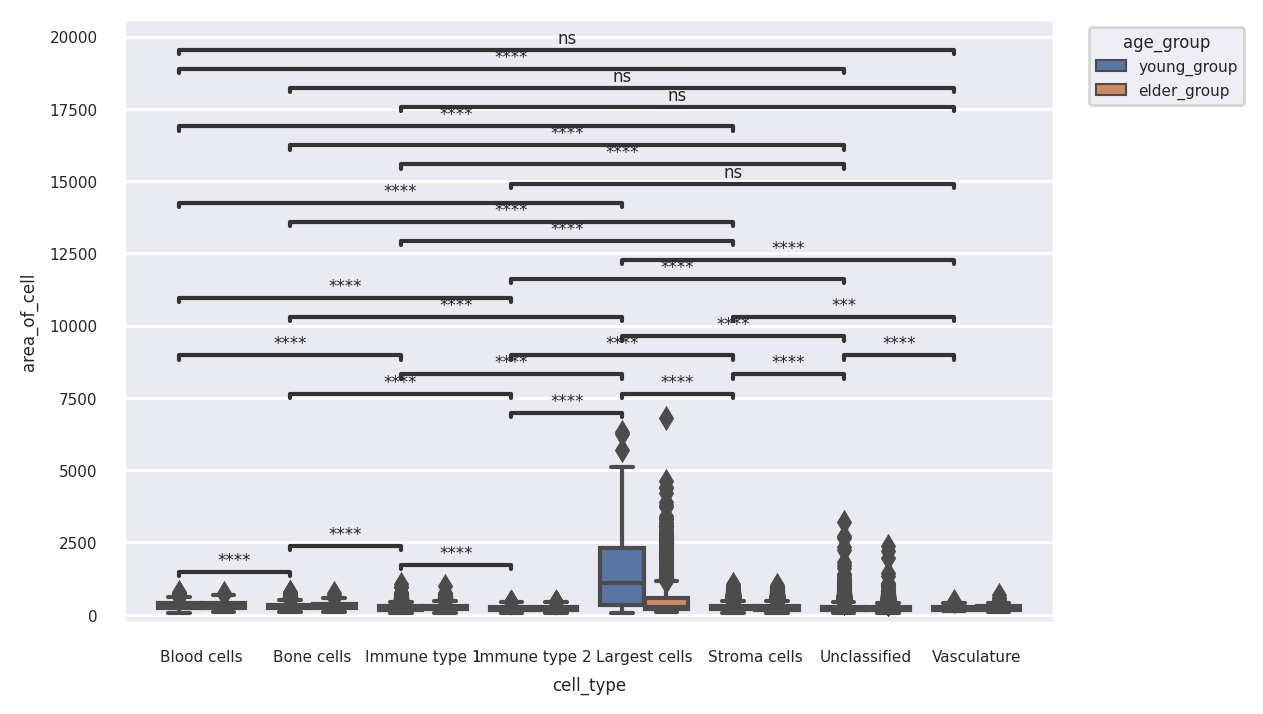

In [14]:
sns.set (font_scale=0.5)
plt.rcParams['figure.dpi'] = 200

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, hue_pairs_young_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

Далее сравним размер клеток у разных типов клеток у возрастных пациентов.

Также выполним проверку на нормальность. Все распределения отличаются от нормального.
Сравнивать будем при помощи теста Манна-Уитни с поправкой Бонферрони.

In [ ]:
# Shapiro-Wilk test.

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'elder_group')]['area_of_cell'])
  print('p-value', p)

p-value 0.0
p-value 0.0
p-value 1.7674022210258504e-27
p-value 5.183810602993333e-10
p-value 1.2447719244246258e-10
p-value 3.8383526755706794e-40
p-value 1.4942274811381453e-30
p-value 1.8598373685563274e-07


На данном графике представлены сравнения размеров клеток у разных типов клеток у возрастных пациентов.

Не определяются значимые различия для: Blood cells - Vasculature, Bone cells - Vasculature, Immune type 1 - Vasculature, Immune type 2 - Vasculature, Largest cells - Unclassified, Stroma cells, Stroma cells - Unclassified.

Для всех остальных клеток различия значимы.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unclassified_elder_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.101e-164 U_stat=4.744e+08
Immune type 2_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.395e-68 U_stat=1.063e+06
Immune type 1_elder_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.362e-15 U_stat=6.776e+06
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.090e+05
Bone cells_elder_group vs. Largest cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.746e+05
Largest cells_elder_group vs. Vasculature_elder_group: 

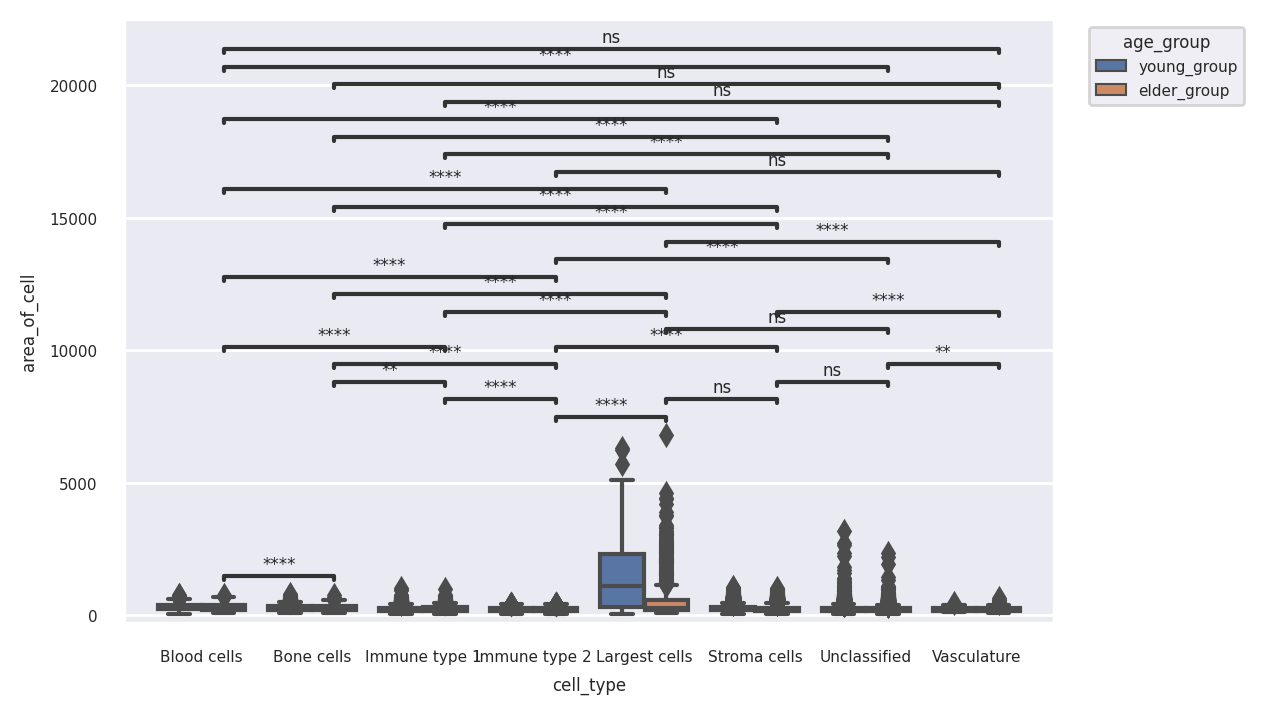

In [ ]:
sns.set (font_scale=0.5)
plt.rcParams['figure.dpi'] = 200

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, hue_pairs_elder_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

На данном графике представлены сравнения размеров типа клеток у пациентов разного возраста..

Не определяются значимые различия по размеру между возрастами для: Largest Cells и Vasculature.

Для всех остальных типов клеток значимые различия определяются для разных возрастов.

Для сравнения используется тест Манна-Уитни с поправкой Бонферрони.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.338e-106 U_stat=3.119e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.063e-12 U_stat=5.303e+08
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.104e-03 U_stat=2.971e+06
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.459e-15 U_stat=3.025e+07
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.026e+05
Bone cells_young_group vs. Bone cells_elder_group: 

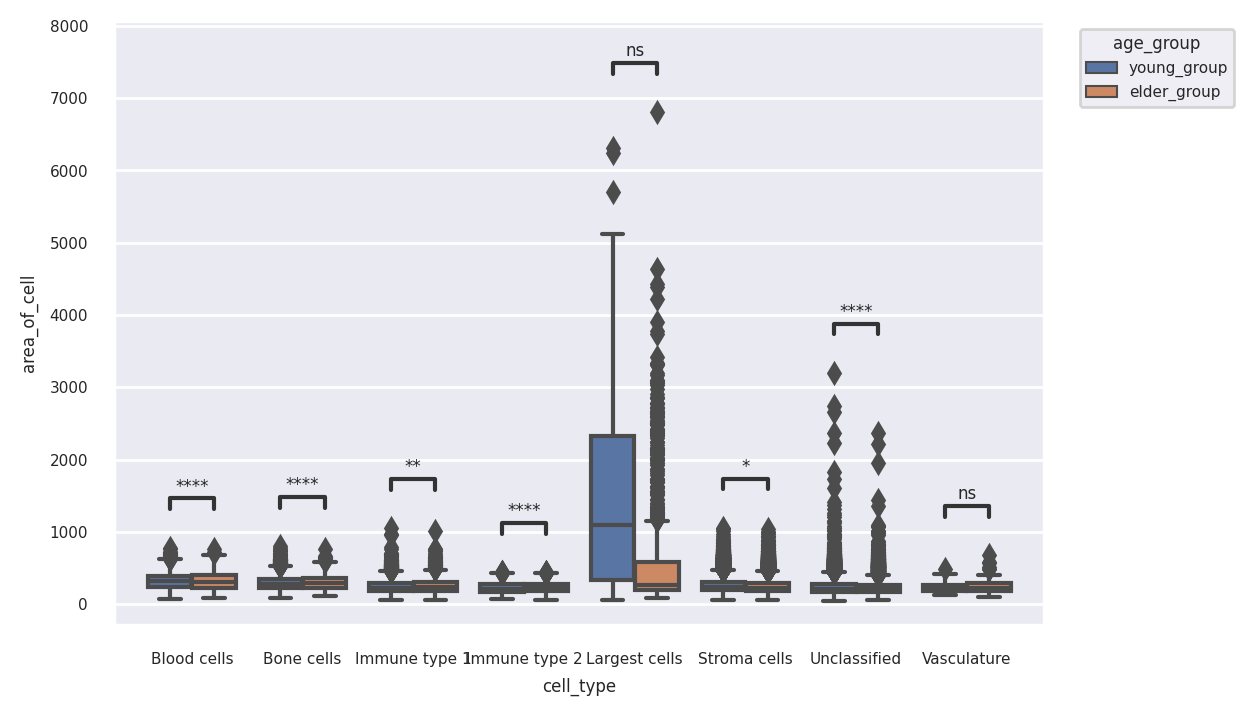

In [ ]:
sns.set (font_scale=0.5)
plt.rcParams['figure.dpi'] = 200

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, pairs_y_e, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

1) Есть ли стат-значимость между типом клетки и:

б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.

Сравним типы клеток и экспрессию иммунного маркера 1.

In [ ]:
# Create variables.

x = 'cell_type' 
y = 'immune_marker_1'
hue = 'age_group'

Для выбора статистического теста проверим распределения на нормальность.
Все распределения отличаются от нормального.

Для дальнейших сравнений будет использоваться тест Манна-Уитни с поправкой Бонферрони.

In [ ]:
# Shapiro-Wilk test.

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'elder_group')]['immune_marker_1'])
  print('p-value', p)

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'young_group')]['immune_marker_1'])
  print('p-value', p)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value 0.0
p-value 0.0
p-value 2.0050237605040273e-36
p-value 3.177143877847177e-13
p-value 0.0607500858604908
p-value 9.576008560887735e-24
p-value 4.015343556437066e-18
p-value 0.0004979001241736114
p-value 0.0
p-value 0.0
p-value 0.0
p-value 8.359069319902486e-38
p-value 1.2874977534867693e-23
p-value 9.112889089167759e-35
p-value 1.0293805866860695e-33
p-value 3.777294477913529e-05


На данном графике представлены сравнения типов клеток по экспрессии иммунного маркера 1 у молодых пациентов.

По результатам сравнений не наблюдается значимых различий между:
Stroma Cells и Vasculature, Immune type 1 - Vasculature.

Для всех остальных клеток различия в экспрессии иммунного маркера 1 значимы для молодых пациентов.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Immune type 1_young_group vs. Immune type 2_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=3.056e+07
Unclassified_young_group vs. Stroma cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.607e-99 U_stat=2.943e+09
Stroma cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=6.532e+07
Immune type 2_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.619e-98 U_stat=7.074e+06
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=7.049e+05
Bone cells_young_group vs. Largest cells_young_group: 

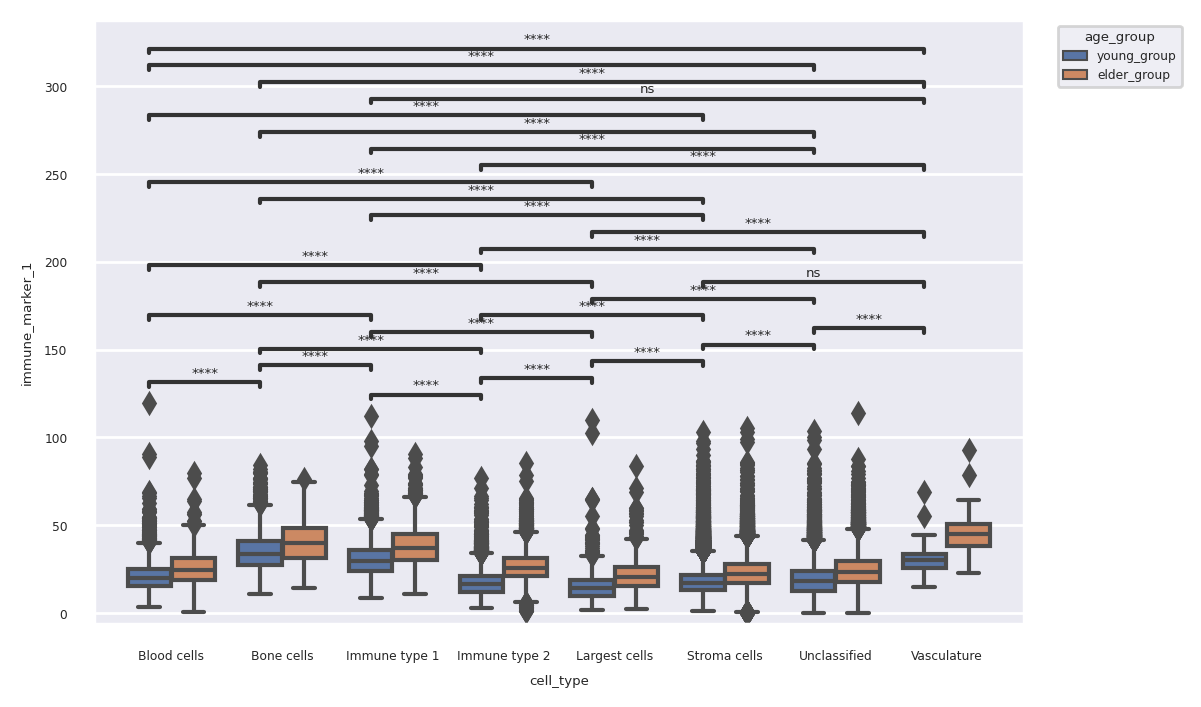

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, hue_pairs_young_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

График сравнений экспрессии иммунного маркера 1 для возрастных пациентов.

Между всеми типами клеток есть значимые различия, кроме Immune type 2 - Largest cells.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unclassified_elder_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.486e-73 U_stat=5.893e+08
Immune type 2_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.113e-02 U_stat=2.126e+06
Immune type 1_elder_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=9.685e+06
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.512e-61 U_stat=3.624e+04
Bone cells_elder_group vs. Largest cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.501e-109 U_stat=3.067e+05
Largest cells_elder_group vs. Vasculature_elder_group: 

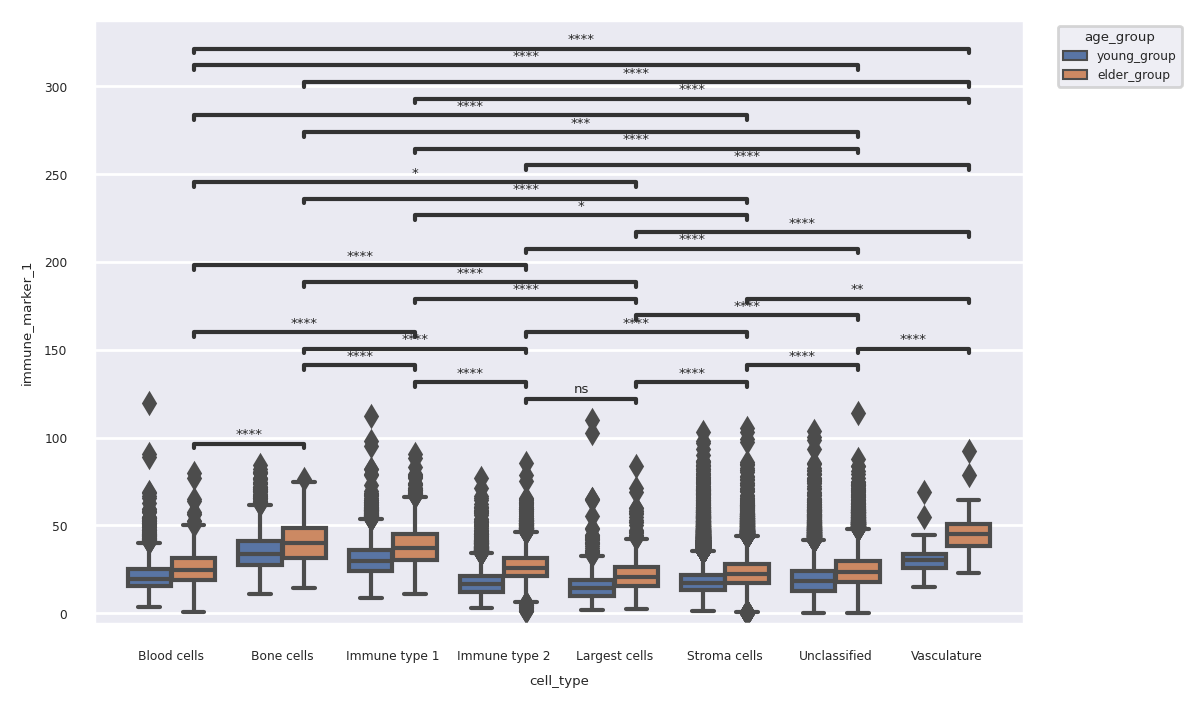

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, hue_pairs_elder_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

График сравнения экспрессии иммунного маркера 1 для разных типов клетов по возрастам.

Для всех типов клеток разлилчия между возрастными группами значимы.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=1.867e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=3.449e+08
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.197e-125 U_stat=1.867e+06
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=1.147e+07
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.445e-26 U_stat=4.163e+05
Bone cells_young_group vs. Bone cells_elder_group: 

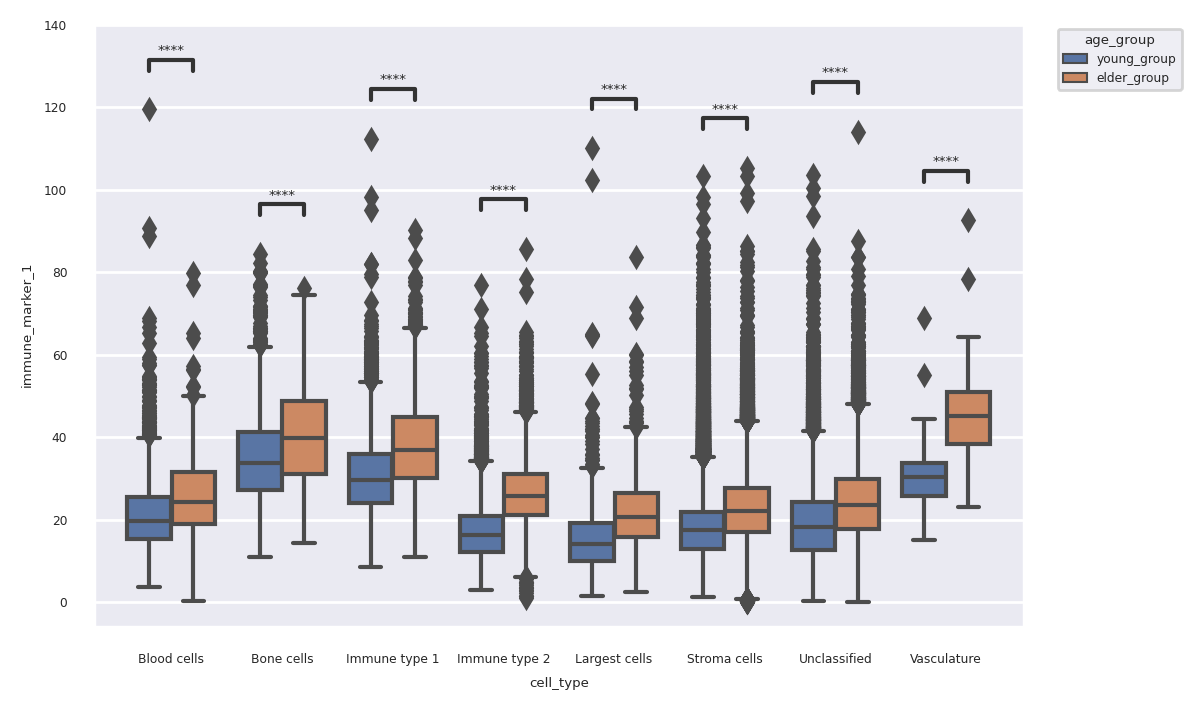

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, pairs_y_e, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

Далее сравним экспрессиию иммунного маркера 2 для разных типов клетов.

In [ ]:
# Create variables.

x = 'cell_type' 
y = 'immune_marker_2'
hue = 'age_group'

Для выбора статистического теста проверим распределения на нормальность. Все распределения отличаются от нормального.

Для дальнейших сравнений будет использоваться тест Манна-Уитни с поправкой Бонферрони.

In [ ]:
# Shapiro test.

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'elder_group')]['immune_marker_2'])
  print('p-value', p)

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'young_group')]['immune_marker_2'])
  print('p-value', p)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value 0.0
p-value 0.0
p-value 0.0
p-value 8.571654134497074e-18
p-value 5.848411853759404e-20
p-value 1.6935076457664025e-37
p-value 0.0
p-value 1.355716449324973e-06
p-value 0.0
p-value 0.0
p-value 0.0
p-value 6.6205017332662055e-34
p-value 2.33533332094353e-33
p-value 1.9582153669303103e-31
p-value 2.6357583334871214e-40
p-value 1.6265995554931578e-06


На графике представлены сравнения экспрессии иммунного маркера 2 для разных типов клеток у молодых пациентов.

Не определяетя значимых различий для: 
Blood Cells - Vasculature, Immune type 2 - Vasculature, Unclassified - Vasculature.

Для остальных типов клеток определяются значимые различия в экспрессии иммунного маркера 2 у молодых пациентов.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Immune type 1_young_group vs. Immune type 2_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.265e-254 U_stat=2.378e+07
Unclassified_young_group vs. Stroma cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=2.318e+09
Stroma cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.097e-67 U_stat=2.128e+08
Immune type 2_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=1.425e+06
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.459e-29 U_stat=1.991e+06
Bone cells_young_group vs. Largest cells_young_group:

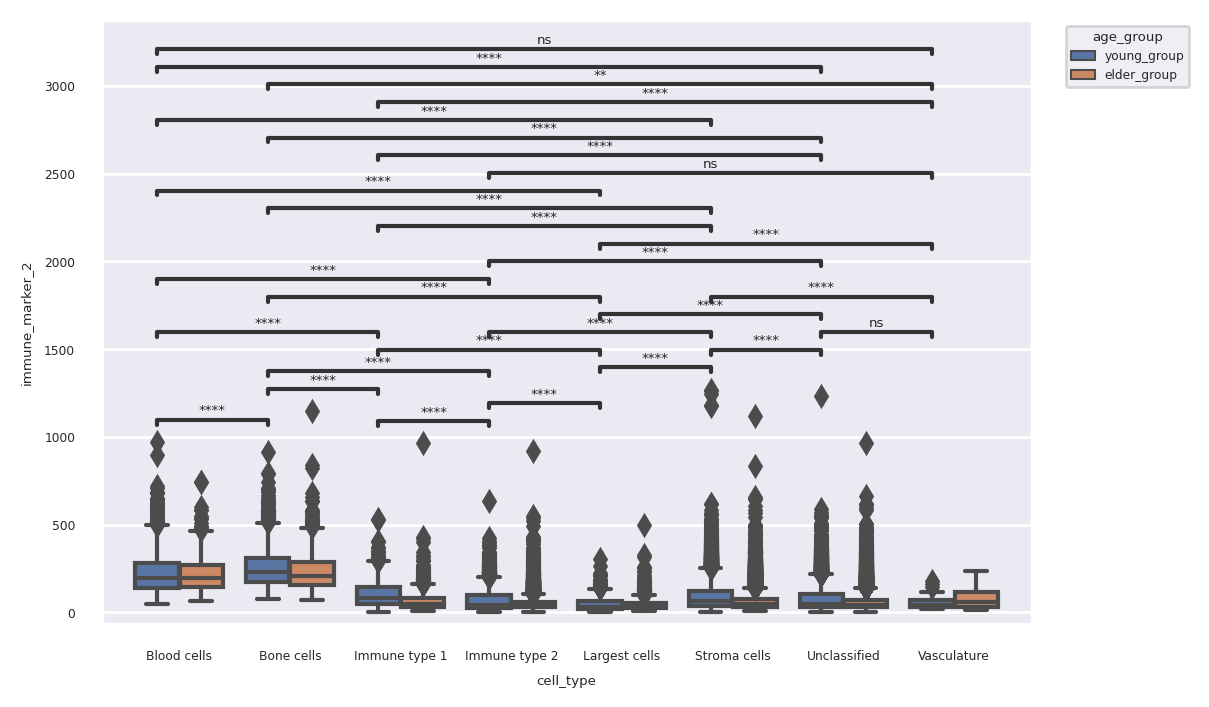

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, hue_pairs_young_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

Для возрастных пациентов не определяется значимой разницы в экспрессии иммунного маркера 2 для:

Bone cells - Immune type 1, Largest cells - Stroma cells, Bone cells - Unclassified, Immune type 1 - Vascularite.

Для всех остальных типов клеток есть значимые различия в экспрессии иммунного маркера 2 у возрастных пациентов.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unclassified_elder_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.903e-90 U_stat=4.925e+08
Immune type 2_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.541e-265 U_stat=1.732e+05
Immune type 1_elder_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.994e-23 U_stat=6.965e+06
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.344e-01 U_stat=9.310e+04
Bone cells_elder_group vs. Largest cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.535e-161 U_stat=3.358e+05
Largest cells_elder_group vs. Vasculature_elder_group:

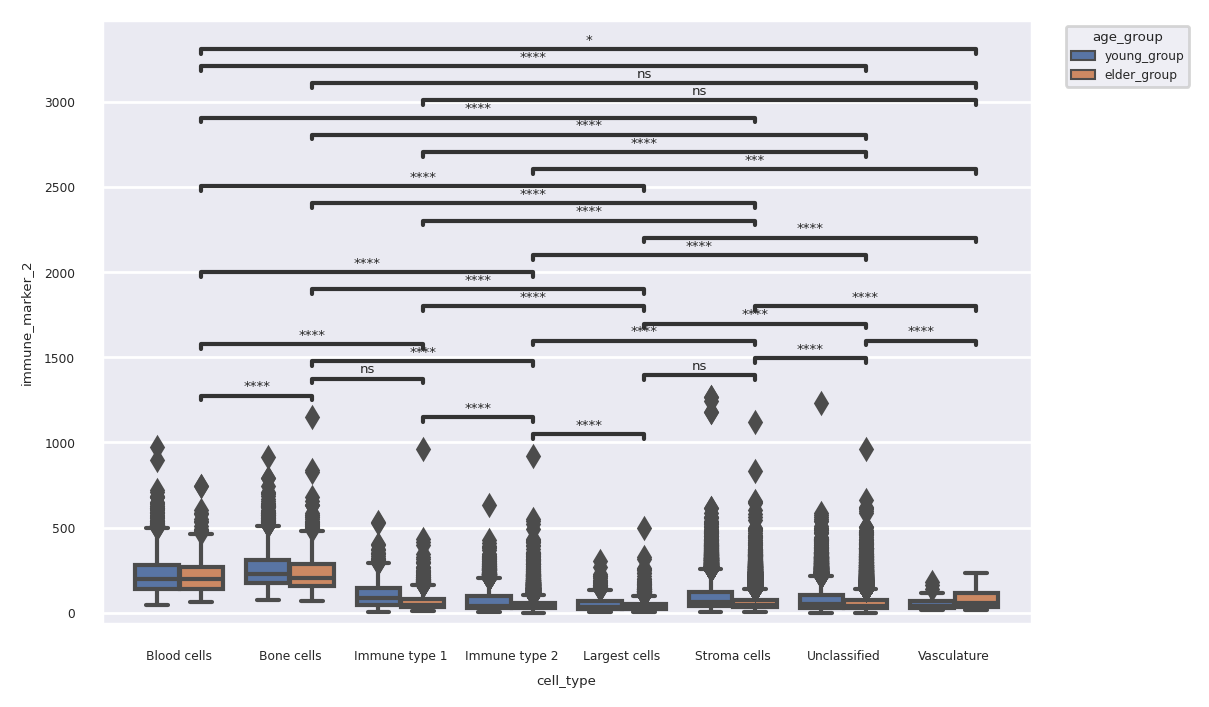

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, hue_pairs_elder_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

При сравнении экспрессии иммунного маркера 2 между возрастными группами, не определяется значимой разницы для: Vasculature, Unclassified, Largest cells.

Для остальных клеток определяются статистически значимые различия.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=3.503e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:9.919e-87 U_stat=5.605e+08
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.754e-96 U_stat=4.291e+06
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.999e-09 U_stat=3.452e+07
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=5.948e+05
Bone cells_young_group vs. Bone cells_elder_group: M

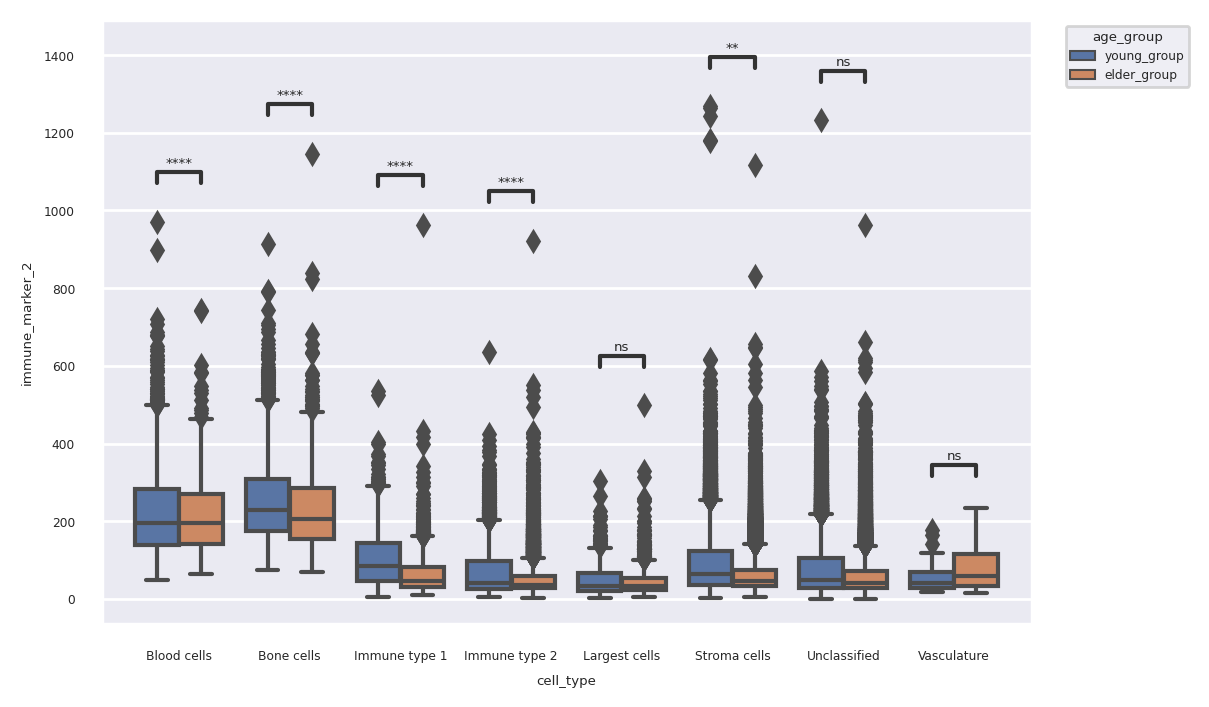

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, pairs_y_e, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

в) Сравним типы клеток по дистанции до крупных сосудов.

In [ ]:
# Create variables.

x = 'cell_type' 
y = 'distance_to_vasculature'
hue = 'age_group'

Распределения в обеих возрастных группах отличаются от нормального.

Для сравнений будет использован тест Манна-Уитни с поправкой Бонферрони.

In [ ]:
# Shapiro test.

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'elder_group')]['distance_to_vasculature'])
  print('p-value', p)

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'young_group')]['distance_to_vasculature'])
  print('p-value', p)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value 0.0
p-value 0.0
p-value 0.0
p-value 6.750849942638814e-17
p-value 9.85313590522627e-17
p-value 5.5248891569483404e-21
p-value 4.605305831213119e-28
p-value 4.868252911904847e-09
p-value 0.0
p-value 0.0
p-value 2.802596928649634e-45
p-value 3.4543547561225583e-22
p-value 7.393541940273271e-19
p-value 3.019270963344582e-15
p-value 7.42627647273634e-27
p-value 1.3397572114215439e-11


Ниже представлен график сравнений расстояния до крупных сосудов для разных типов клеток у молодых пациентов.

Не обнаружены статистически значимые разлилия для:
Stroma cells - Immune type 1, Blood cells - Bone cells, Immune type 2 - Largest cells, Unclassified - Largest cells.

Для всех остальных групп клеток разлилчия статистически значимы.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Immune type 1_young_group vs. Immune type 2_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.021e-17 U_stat=1.897e+07
Unclassified_young_group vs. Stroma cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.298e-30 U_stat=2.650e+09
Stroma cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.531e+08
Immune type 2_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.851e-30 U_stat=8.367e+06
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.436e+06
Bone cells_young_group vs. Largest cells_young_group: 

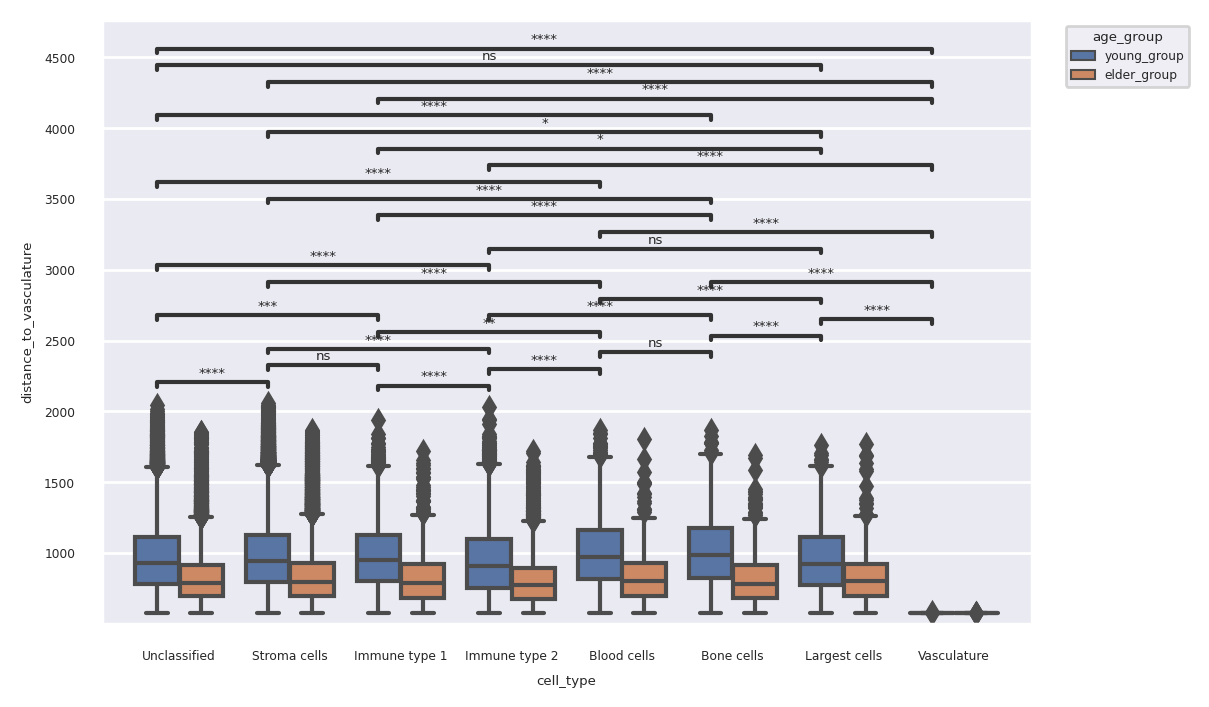

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, order = order)

annotator = Annotator(ax, hue_pairs_young_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

Для группы возрастных пациентов определяется меньше значимых различий.

Статистически значимые разлилчия в расстоянии до крупных сосудов определяются для:
Unclassified - Immune type 2, Stroma cells - Immune type 2, Unclassified - Stroma cells, Immune type 1 - Immune type 2, Immune type 2 - Blood cells, Immune type 2 - Largest cells, Vasculature -  Bone cells, Blood cells, Unclassified, Stroma, Immune type 1.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unclassified_elder_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.585e-02 U_stat=5.347e+08
Immune type 2_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.495e-04 U_stat=1.747e+06
Immune type 1_elder_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.584e-02 U_stat=6.282e+06
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.068e+05
Bone cells_elder_group vs. Largest cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.661e+05
Largest cells_elder_group vs. Vasculature_elder_group: M

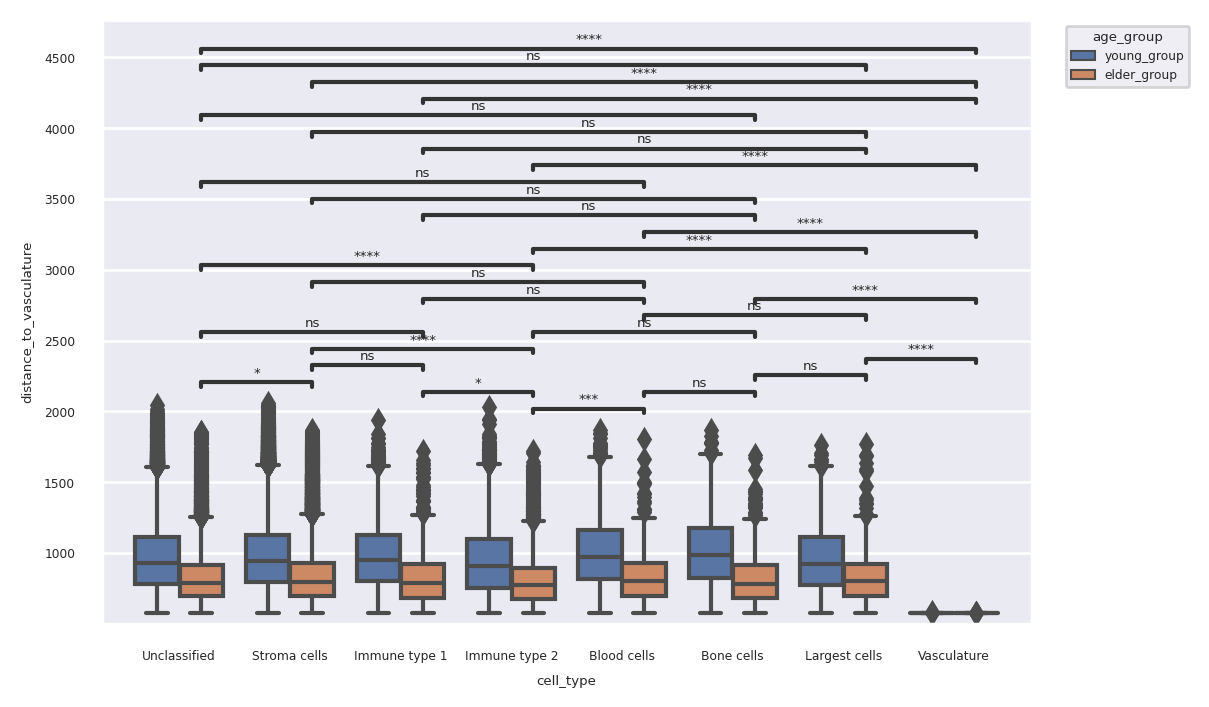

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, order = order)

annotator = Annotator(ax, hue_pairs_elder_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

При сравнении расстояния до крупных сосудов по возрастным группам, статистически значимые различия определяются для всех типов клеток кроме Vasculature.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.039e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=6.991e+08
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.851e-131 U_stat=4.486e+06
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:0.000e+00 U_stat=4.425e+07
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.535e-52 U_stat=8.547e+05
Bone cells_young_group vs. Bone cells_elder_group: 

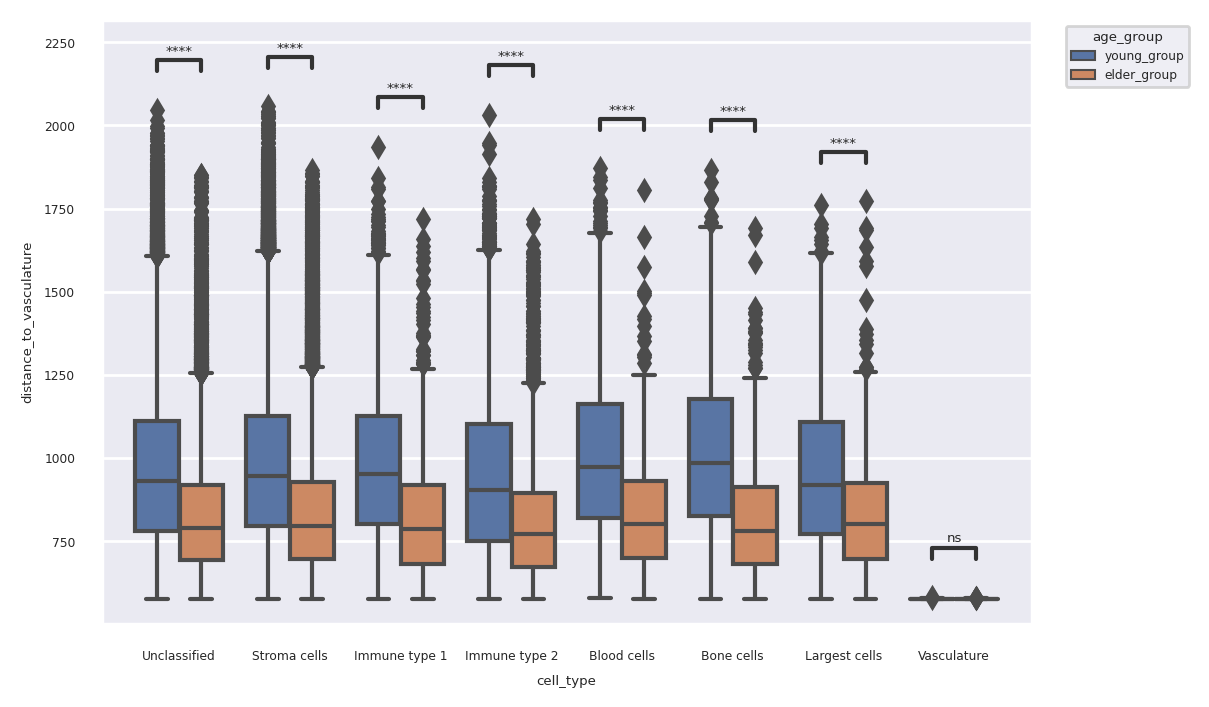

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, order = order)

annotator = Annotator(ax, pairs_y_e, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

Далее сравним расстояние до крупных клеток для разных типов клеток.

In [ ]:
# Create variables.

x = 'cell_type' 
y = 'distance_to_largest_cell'
hue = 'age_group'

Распределения в обеих возрастных группах отличаются от нормального.

Для сравнений будет использован тест Манна-Уитни с поправкой Бонферрони.

In [ ]:
# Shapiro test.

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'elder_group')]['distance_to_largest_cell'])
  print('p-value', p)

for i in data['cell_type'].unique():
  stat, p = shapiro(data[(data['cell_type'] == i) &
                         (data['age_group'] == 'young_group')]['distance_to_largest_cell'])
  print('p-value', p)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value 0.0
p-value 0.0
p-value 0.0
p-value 2.567617903642359e-29
p-value 6.981963009686195e-23
p-value 1.4818628595185987e-15
p-value 3.385256830115893e-41
p-value 1.6299975258426969e-10
p-value 0.0
p-value 0.0
p-value 0.0
p-value 7.555515454752691e-39
p-value 9.523453450066482e-35
p-value 4.925903457747556e-19
p-value 0.0
p-value 3.2487449175278016e-08


В группе молодых пациентов определяются статистически значимые различия в расстоянии до крупных клеток для:

Unclassified - Stroma cells, Stroma cells - Immune type 1,2, Unclassified - Immune type 1,2, Immune type 1 - Blood cells, Immune type 2 - Bone cells, Blood cells - Largest cells, Bone cells - Vasculature, Largest cells - Vasculature, Immune type 2 - Largest cells, Immune type 1 - Bone cells, Unclassified - Largest cells, Stroma cells - Largest cells.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Immune type 1_young_group vs. Immune type 2_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.922e-02 U_stat=1.661e+07
Unclassified_young_group vs. Stroma cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.554e-07 U_stat=2.806e+09
Stroma cells_young_group vs. Immune type 1_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.170e-10 U_stat=2.705e+08
Immune type 2_young_group vs. Blood cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=9.686e+06
Blood cells_young_group vs. Bone cells_young_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.401e+06
Bone cells_young_group vs. Largest cells_young_group: 

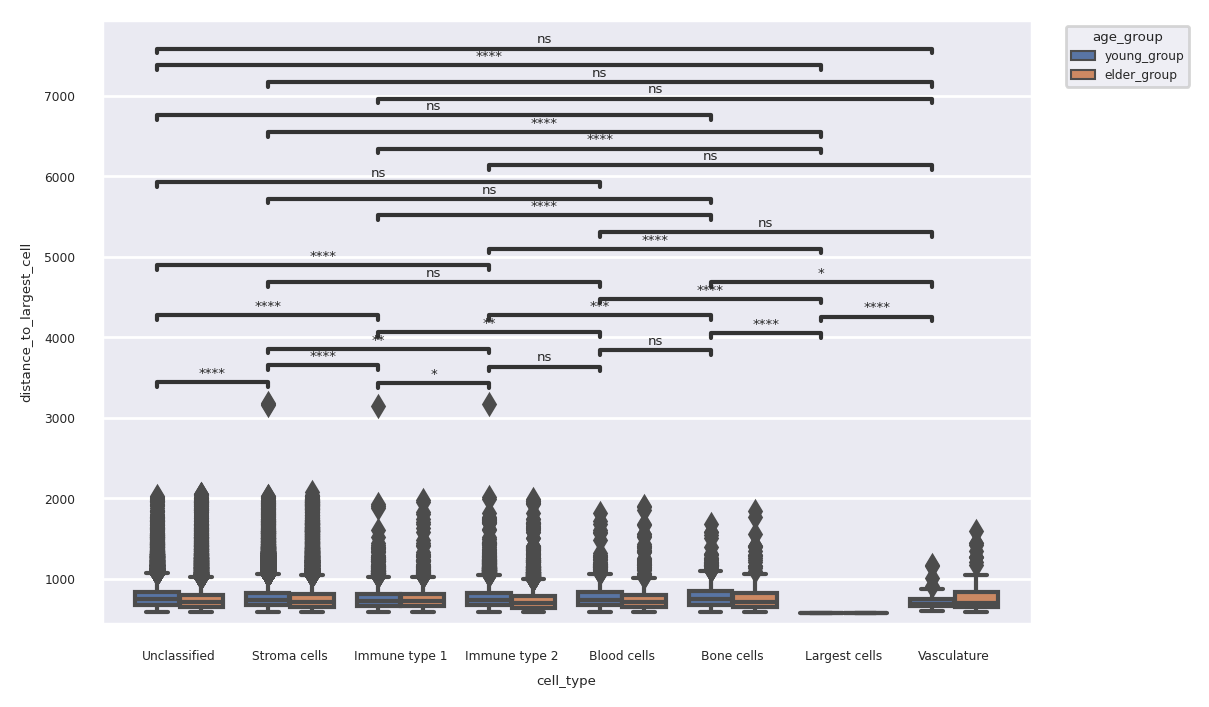

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, order = order)

annotator = Annotator(ax, hue_pairs_young_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

Для возрастных пациентов определяются значимые различия в расстоянии до крупных клеток между:

Unclassified - Largest cell, Immune type 2, Immune type 1, Immune type 2 - Immune type 2, Largest cell - Bone cell, Blood cell, Immune type 2, Stroma cells.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unclassified_elder_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.414e-06 U_stat=5.301e+08
Immune type 2_elder_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=1.869e+06
Immune type 1_elder_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.353e-13 U_stat=6.729e+06
Blood cells_elder_group vs. Bone cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=9.876e+04
Bone cells_elder_group vs. Largest cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.492e-177 U_stat=3.437e+05
Largest cells_elder_group vs. Vasculature_elder_group: 

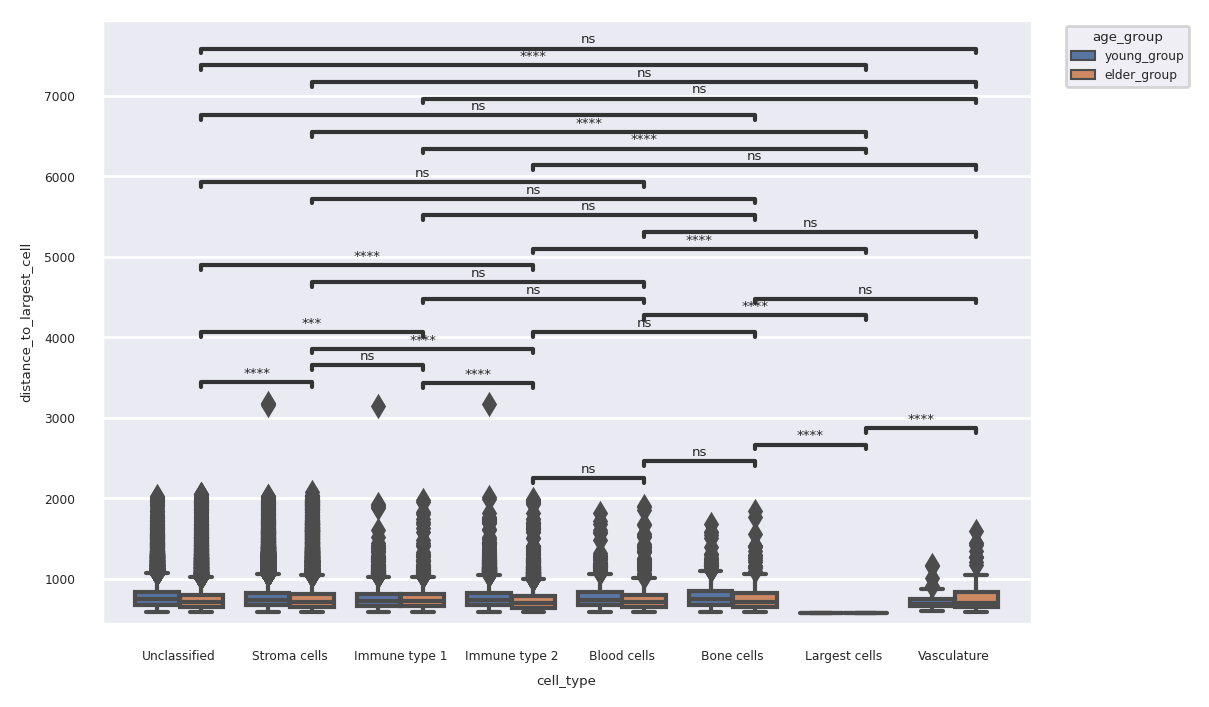

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, order = order)

annotator = Annotator(ax, hue_pairs_elder_2, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

При сравнении расстояния до крупных клеток по возрастным группам определяются значимые различия для:
Unclassified, Stroma cells, Immune type 2, Blood cells, Bone cells.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Stroma cells_young_group vs. Stroma cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.181e-239 U_stat=3.220e+09
Unclassified_young_group vs. Unclassified_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.045e-221 U_stat=5.892e+08
Immune type 1_young_group vs. Immune type 1_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.168e+06
Immune type 2_young_group vs. Immune type 2_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.355e-73 U_stat=3.807e+07
Blood cells_young_group vs. Blood cells_elder_group: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.688e-05 U_stat=6.779e+05
Bone cells_young_group vs. Bone cells_elder_group:

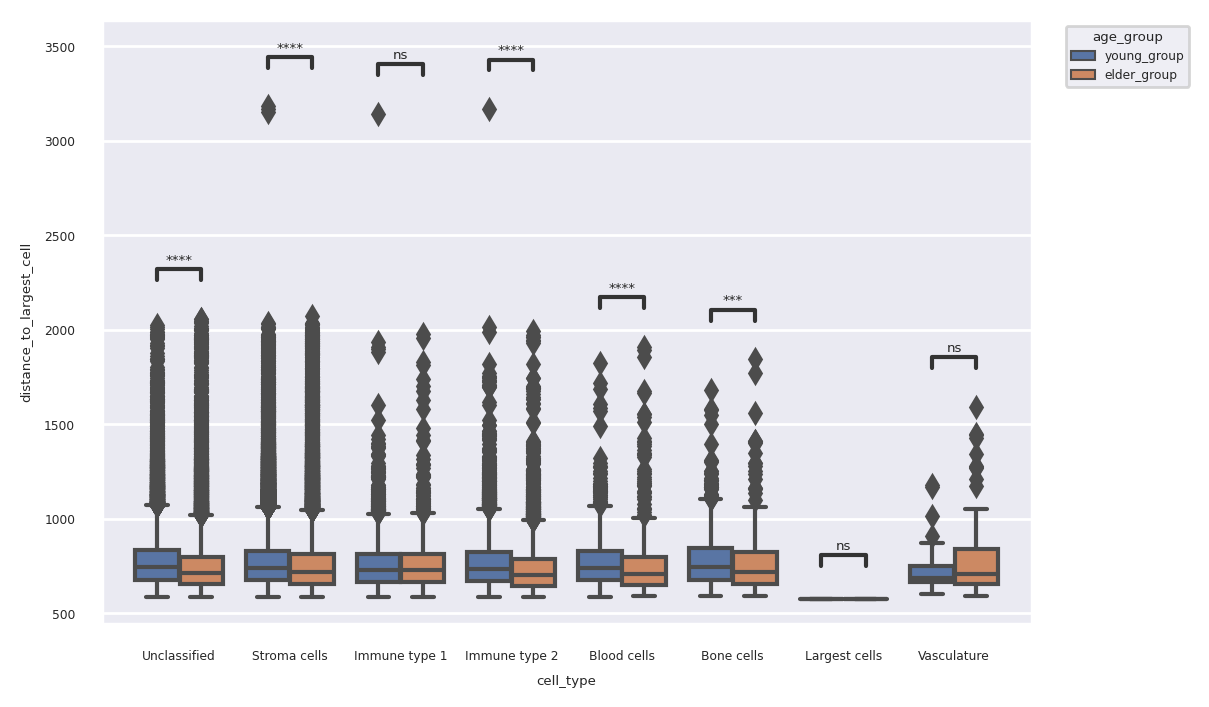

In [ ]:
sns.set (font_scale=0.4)

ax = sns.boxplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, order = order)

annotator = Annotator(ax, pairs_y_e, data=data, x=x, y=y, hue_order=hue_order, order = order, hue=hue)
annotator.configure(test='Mann-Whitney', comparisons_correction="bonferroni", text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)

**Задание 2.**
В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях?
Необходимо посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [48]:
# Task 2.
# Converting dataset.

df = data.reset_index()
df.head()

,index,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group


In [49]:
# Let's count the number of cells in each microenvironment.
# Converting the table.

comm_cell_df = pd.pivot_table(df, 
                index=['cell_interaction', 'case_id'], 
                columns='cell_type',
                values='index',
                aggfunc=len
                ).fillna(0)

comm_cell_df = comm_cell_df.reset_index()

comm_cell_df.head()

cell_type,cell_interaction,case_id,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
0,community_1,40,37.0,27.0,27.0,1343.0,67.0,5522.0,396.0,2.0
1,community_1,199,155.0,37.0,39.0,898.0,48.0,6490.0,651.0,0.0
2,community_1,559,42.0,29.0,11.0,56.0,11.0,1401.0,117.0,3.0
3,community_1,566,9.0,15.0,4.0,187.0,11.0,975.0,85.0,1.0
4,community_1,693,351.0,799.0,306.0,1025.0,103.0,9576.0,1350.0,3.0


Составим датафрейм с разделением на типы микроокружений и клеток. Количество клеток посчитано с учетом разделения на разных пациентов.

In [50]:
cell_types = ['Blood cells', 'Bone cells', 'Immune type 1', 'Immune type 2',
              'Largest cells', 'Stroma cells', 'Unclassified', 'Vasculature']

comm_cell_df = pd.melt(comm_cell_df, value_vars=cell_types, var_name='cell_type',
                       value_name='cell_number', id_vars='cell_interaction')

comm_cell_df.head()

,cell_interaction,cell_type,cell_number
0,community_1,Blood cells,37.0
1,community_1,Blood cells,155.0
2,community_1,Blood cells,42.0
3,community_1,Blood cells,9.0
4,community_1,Blood cells,351.0


Посмотрим на общий график для всех типов клеток и всех микроокружений.

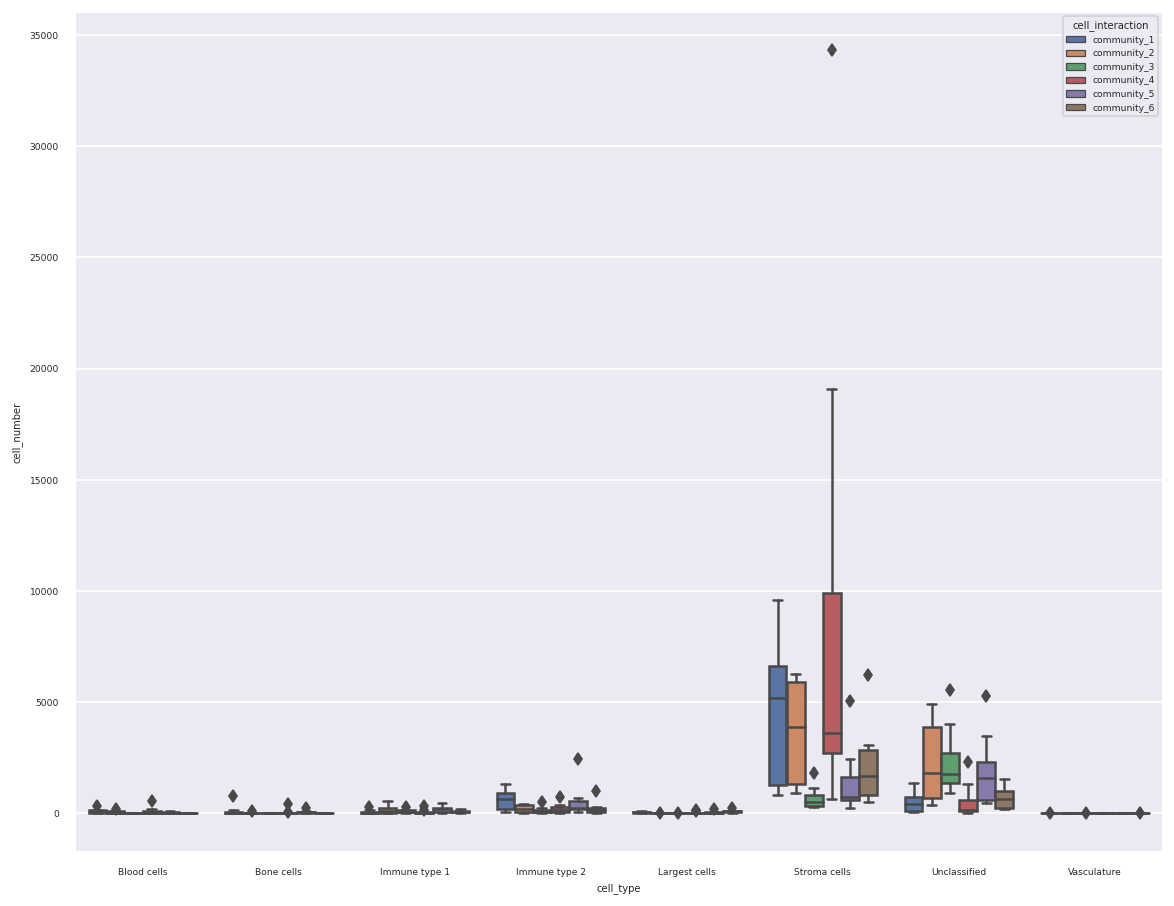

In [51]:
sns.set(rc={'figure.figsize':(11.7,9.27)})
sns.set (font_scale=0.5)
sns.boxplot(data=comm_cell_df, x='cell_type', y='cell_number', hue='cell_interaction')

Для лучшей наглядности далее будем рассматривать отдельно каждое микроокружение.


Микроокружение 1.

In [105]:
comm_1 = comm_cell_df[comm_cell_df['cell_interaction'] == 'community_1']
comm_1.head()

,cell_interaction,cell_type,cell_number
0,community_1,Blood cells,37.0
1,community_1,Blood cells,155.0
2,community_1,Blood cells,42.0
3,community_1,Blood cells,9.0
4,community_1,Blood cells,351.0


Далее планируется сранивать количество клеток сгруппированных по разным типам клеток в первом микроокружении. 

Чтобы избежать проблемы множественных сравнений и использования консервативных поправок (напимер Бонферрони), в данном случае можно воспользоваться такими тестами как ANOVA или Крускалл-Уоллис, с последующим пост-хок тестированием.

Для выбора дальнейшего статистического теста проверим данные на нормальность.

Некоторые распределения отличаются от нормального, для сравнения нескольких групп будет использоваться Крускал-Уоллис тест.

In [107]:
# Shapiro test.

for i in comm_1['cell_type'].unique():
  stat, p = shapiro(comm_1[comm_1['cell_type'] == i]['cell_number'])
  print('p-value', p)

p-value 0.019598782062530518
p-value 3.893616667483002e-05
p-value 0.0024134661071002483
p-value 0.5521568059921265
p-value 0.4475826025009155
p-value 0.35242003202438354
p-value 0.3281635046005249
p-value 0.12817871570587158


Подготовка данных и проведение тестирования Крускал-Уоллис.

Есть статистически значимые различия в количестве разных типов клетов в первом микроокружении. 

In [108]:
# Prepare the data for testing Kruskal-Wallis.

types = np.unique(comm_1.cell_type)

data_types = []

for typ in types:
    data_types.append(comm_1[comm_1.cell_type == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=46.785290245019475, pvalue=6.146940346536637e-08)

Теперь можно провести пост-хок тестирование.
Используется тест Даннета с поправкой Бенджамини-Хохберга (FDR).
По результатам теста видны значимые различия преимущественно в количестве Stroma cells и Vasculature.

In [109]:
# Posthoc dunn test, with correction for multiple testing

dunn_df = posthoc_dunn(
    comm_1, val_col='cell_number', group_col='cell_type', p_adjust="fdr_bh"
)
dunn_df

,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
Blood cells,1.000000,0.835116,0.638837,0.091696,0.782973,4.730648e-03,0.156159,3.029366e-02
Bone cells,0.835116,1.000000,0.784341,0.061233,0.835116,2.241815e-03,0.102368,4.444324e-02
Immune type 1,0.638837,0.784341,1.000000,0.030294,0.835116,6.342382e-04,0.055188,8.875309e-02
Immune type 2,0.091696,0.061233,0.030294,1.000000,0.044443,2.449369e-01,0.835116,7.916872e-05
Largest cells,0.782973,0.835116,0.835116,0.044443,1.000000,1.177644e-03,0.074515,6.123338e-02
Stroma cells,0.004731,0.002242,0.000634,0.244937,0.001178,1.000000e+00,0.145290,1.232518e-07
Unclassified,0.156159,0.102368,0.055188,0.835116,0.074515,1.452902e-01,1.000000,2.314699e-04
Vasculature,0.030294,0.044443,0.088753,0.000079,0.061233,1.232518e-07,0.000231,1.000000e+00


Ниже представлена функция для извлечения p-values из матрицы и построение бокс-плотов с обозначением уровня значимости на графике.

In [114]:
def stat_plot(df_p_val: pd.core.frame.DataFrame,
              data: pd.core.frame.DataFrame, x: str) -> None:

  '''A function that extracts p-values from the matrix and builds
     boxplots with the designation of the significance level.
     Args:
           df_p_val(pd.core.frame.DataFrame): matrix of p-values
           data(pd.core.frame.DataFrame): the main dataframe
           x(str): separation parameter
     Returns: None
  '''

  # Select p-value separately.
  remove = np.tril(np.ones(df_p_val.shape), k=0).astype("bool")
  df_p_val[remove] = np.nan

  molten_df = df_p_val.melt(ignore_index=False).reset_index().dropna()

  # Put p-values on plot.
  sns.set (font_scale=0.6)
  plt.rcParams['figure.dpi'] = 160
  ax = sns.boxplot(data=data, x=x, y='cell_number')

  pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
  p_values = [i[1]["value"] for i in molten_df.iterrows()]

  annotator = Annotator(
      ax, pairs, data=data, x=x, y='cell_number'
  )
  annotator.configure(text_format="star", loc="inside")
  annotator.set_pvalues_and_annotate(p_values)

  plt.tight_layout()

В результате: в первом микроокружении стромальных клеток стат.значимо больше, чем blood cells, bone cells, Immune type 1, vasculature, largest cells

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: Custom statistical test, P_val:8.351e-01
Bone cells vs. Immune type 1: Custom statistical test, P_val:7.843e-01
Immune type 1 vs. Immune type 2: Custom statistical test, P_val:3.029e-02
Immune type 2 vs. Largest cells: Custom statistical test, P_val:4.444e-02
Largest cells vs. Stroma cells: Custom statistical test, P_val:1.178e-03
Stroma cells vs. Unclassified: Custom statistical test, P_val:1.453e-01
Unclassified vs. Vasculature: Custom statistical test, P_val:2.315e-04
Blood cells vs. Immune type 1: Custom statistical test, P_val:6.388e-01
Bone cells vs. Immune type 2: Custom statistical test, P_val:6.123e-02
Immune type 1 vs. Largest cells: Custom statistical test, P_val:8.351e-01
Immune type 2 vs. Stroma cells: Custom statistical test, P_val:2.449e-01
Largest cells vs. Unclass

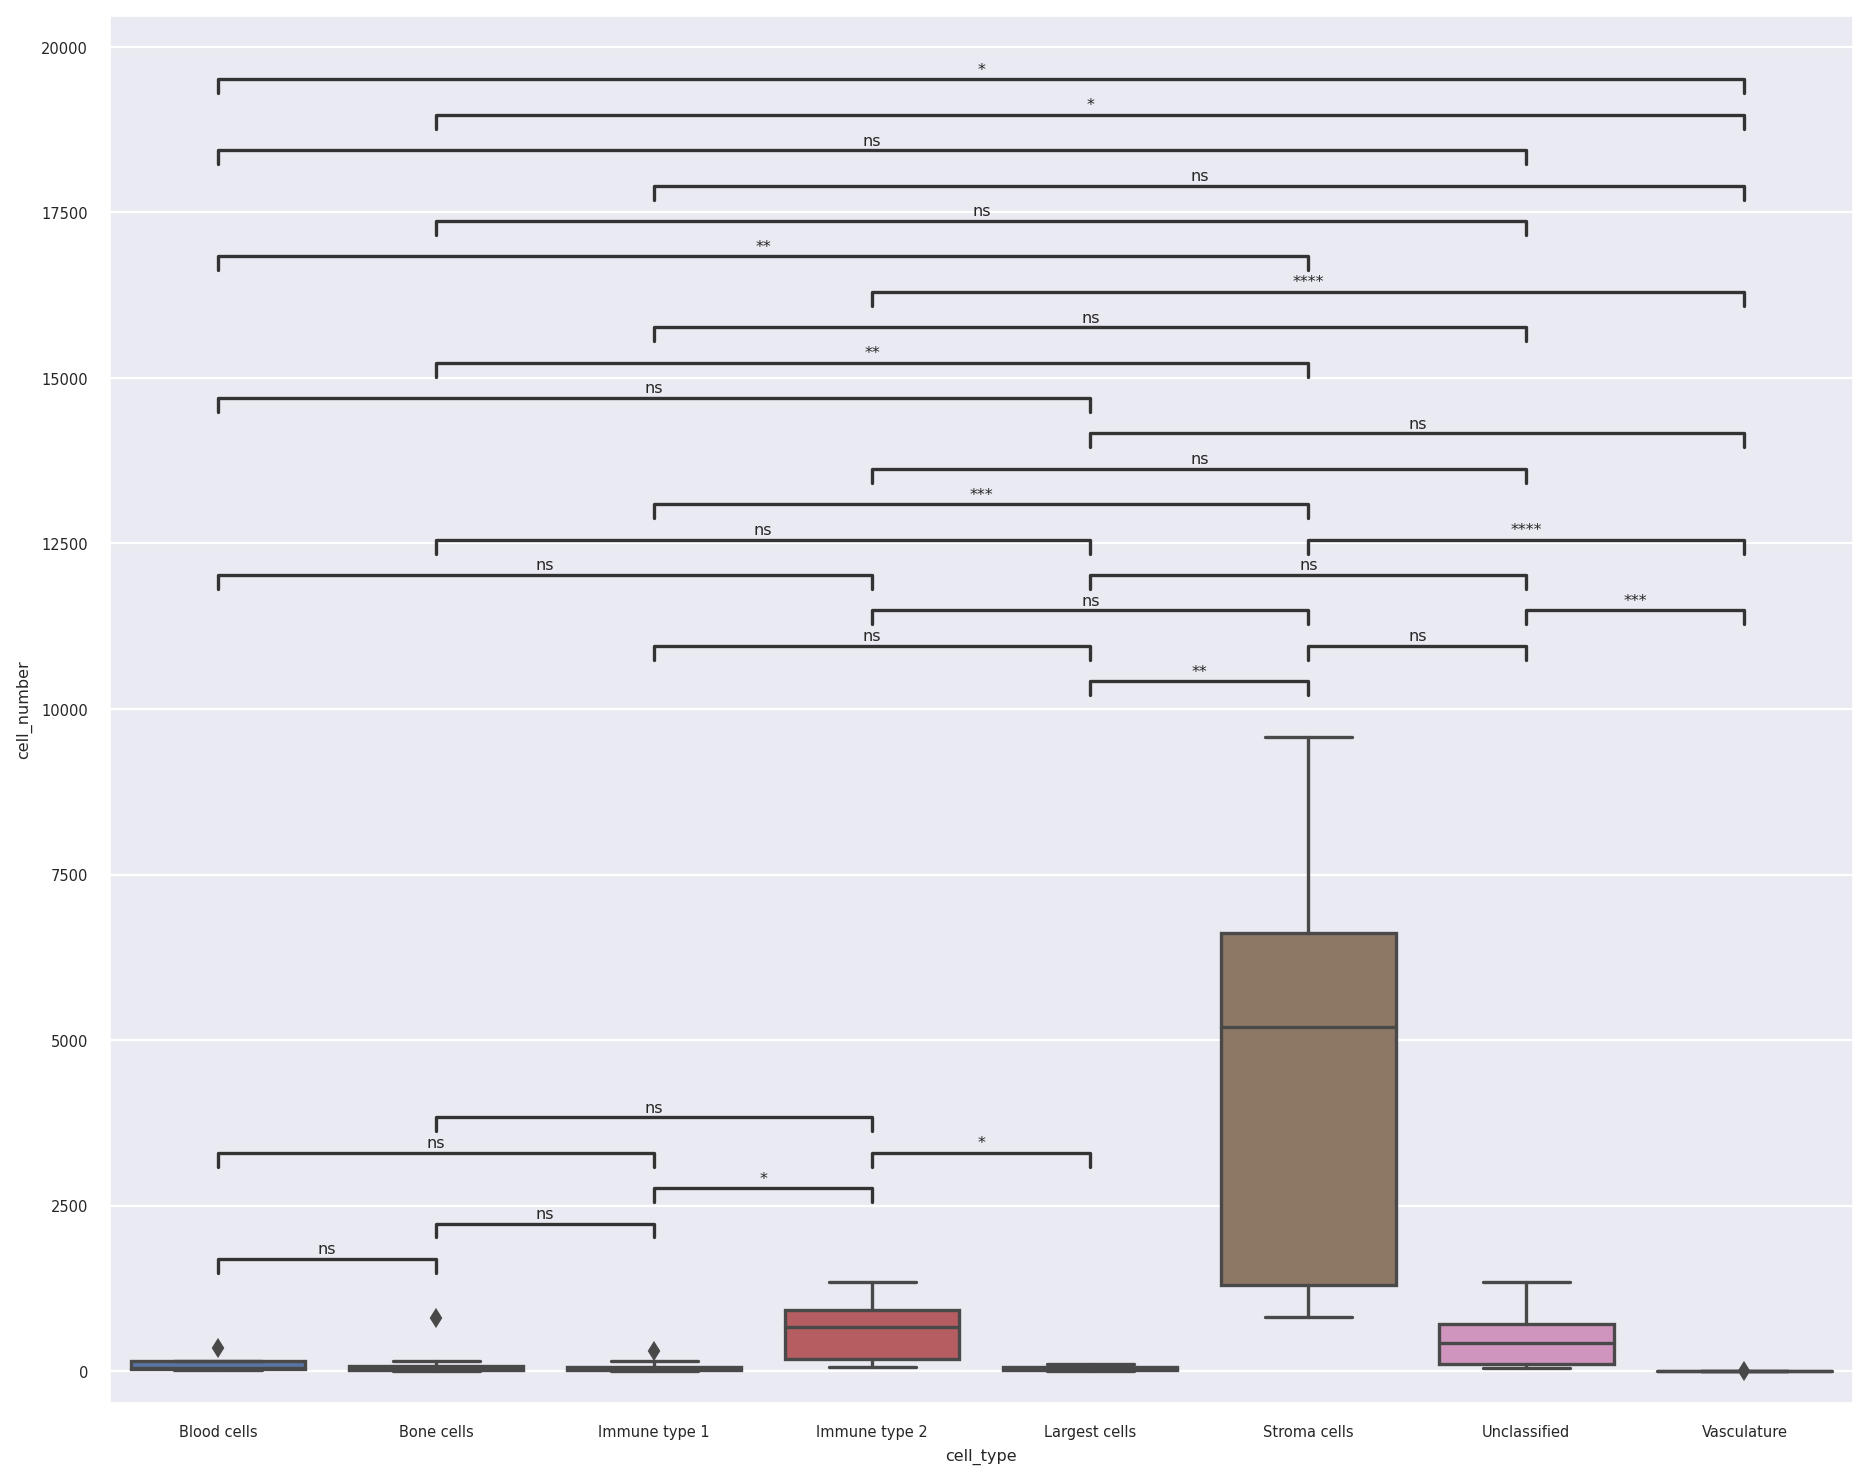

In [115]:
stat_plot(df_p_val=dunn_df, data=comm_1, x='cell_type')

Далее рассмотрим микроокружение 2.

In [116]:
# Community 2.

comm_2 = comm_cell_df[comm_cell_df['cell_interaction'] == 'community_2']
comm_2.head()

,cell_interaction,cell_type,cell_number
8,community_2,Blood cells,40.0
9,community_2,Blood cells,96.0
10,community_2,Blood cells,17.0
11,community_2,Blood cells,11.0
12,community_2,Blood cells,203.0


Для выбора дальнейшего статистического теста проверим данные на нормальность.

Некоторые распределения отличаются от нормального, для сравнения нескольких групп будет использоваться Крускал-Уоллис тест.

In [117]:
# Shapiro test.

for i in comm_2['cell_type'].unique():
  stat, p = shapiro(comm_2[comm_2['cell_type'] == i]['cell_number'])
  print('p-value', p)

p-value 0.022028623148798943
p-value 0.00014367495896294713
p-value 0.05227620154619217
p-value 0.21117310225963593
p-value 0.12549197673797607
p-value 0.05828448012471199
p-value 0.16276967525482178
p-value 0.32971346378326416


Есть статистически значимые различия между количеством разных клеток во втором микроокружении.

In [118]:
# Prepare the data for testing Kruskal-Wallis.

data_types = []

for typ in types:
    data_types.append(comm_2[comm_2.cell_type == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=55.01064999312904, pvalue=1.4836804845843037e-09)

Теперь можно провести пост-хок тестирование.
Используется тест Даннета с поправкой Бенджамини-Хохберга (FDR).
По результатам теста видны значимые различия преимущественно в количестве Stroma cells и Vasculature.

In [119]:
# Posthoc dunn test, with correction for multiple testing.

dunn_df = posthoc_dunn(
    comm_2, val_col='cell_number', group_col='cell_type', p_adjust="fdr_bh"
)
dunn_df

,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
Blood cells,1.000000,0.248156,0.566933,0.343996,0.197968,8.173250e-03,0.024290,2.429045e-02
Bone cells,0.248156,1.000000,0.082198,0.038205,0.861403,1.172656e-04,0.000472,2.481561e-01
Immune type 1,0.566933,0.082198,1.000000,0.727900,0.061099,3.820535e-02,0.083931,3.673363e-03
Immune type 2,0.343996,0.038205,0.727900,1.000000,0.027530,8.219817e-02,0.180499,1.010226e-03
Largest cells,0.197968,0.861403,0.061099,0.027530,1.000000,7.003372e-05,0.000272,3.087839e-01
Stroma cells,0.008173,0.000117,0.038205,0.082198,0.000070,1.000000e+00,0.727900,5.333762e-07
Unclassified,0.024290,0.000472,0.083931,0.180499,0.000272,7.278995e-01,1.000000,2.729227e-06
Vasculature,0.024290,0.248156,0.003673,0.001010,0.308784,5.333762e-07,0.000003,1.000000e+00


В результате: во втором микроокружении стромальных клеток стат.значимо больше, чем blood cells, bone cells, Immune type 1, vasculaturе, largest cells
Количество стромальных клеток значимо не отличается от количества неклассифицированных клеток.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: Custom statistical test, P_val:2.482e-01
Bone cells vs. Immune type 1: Custom statistical test, P_val:8.220e-02
Immune type 1 vs. Immune type 2: Custom statistical test, P_val:7.279e-01
Immune type 2 vs. Largest cells: Custom statistical test, P_val:2.753e-02
Largest cells vs. Stroma cells: Custom statistical test, P_val:7.003e-05
Stroma cells vs. Unclassified: Custom statistical test, P_val:7.279e-01
Unclassified vs. Vasculature: Custom statistical test, P_val:2.729e-06
Blood cells vs. Immune type 1: Custom statistical test, P_val:5.669e-01
Bone cells vs. Immune type 2: Custom statistical test, P_val:3.821e-02
Immune type 1 vs. Largest cells: Custom statistical test, P_val:6.110e-02
Immune type 2 vs. Stroma cells: Custom statistical test, P_val:8.220e-02
Largest cells vs. Unclass

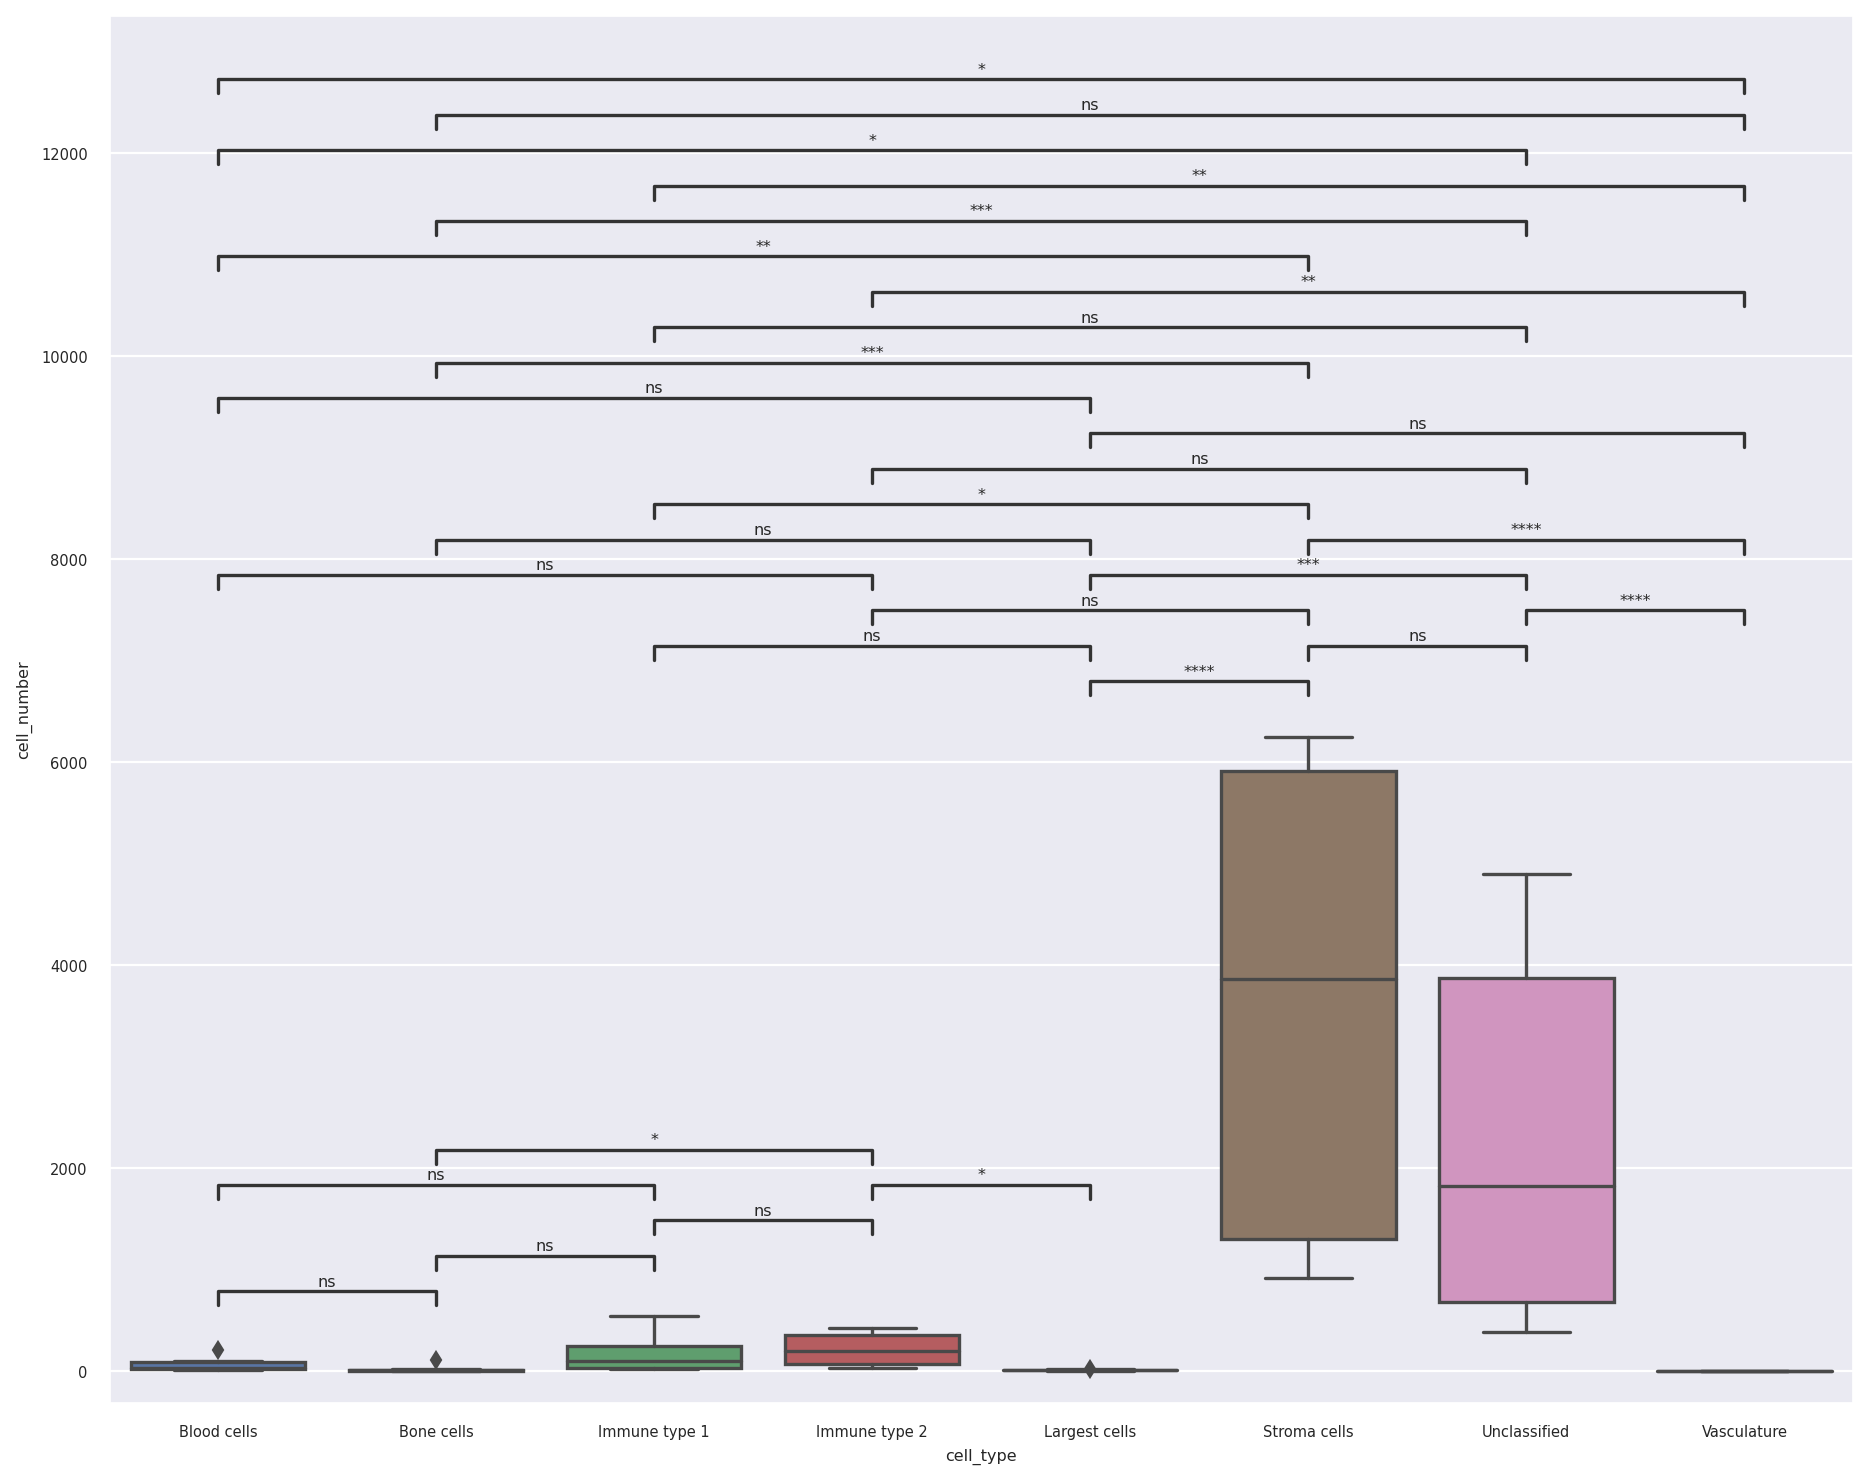

In [120]:
stat_plot(df_p_val=dunn_df, data=comm_2, x='cell_type')

Микроокружение 3.

Некоторые распределения отличаются от нормального, для сравнения групп будет использоваться Крускал-Уоллис тест.

In [121]:
# Community 3.

comm_3 = comm_cell_df[comm_cell_df['cell_interaction'] == 'community_3']

# Shapiro test.

for i in comm_3['cell_type'].unique():
  stat, p = shapiro(comm_3[comm_3['cell_type'] == i]['cell_number'])
  print('p-value', p)

p-value 0.0906723290681839
p-value 0.08050046116113663
p-value 0.13830891251564026
p-value 0.0027504179161041975
p-value 0.029019789770245552
p-value 0.04557549208402634
p-value 0.06723471730947495
p-value 0.04285768046975136


Есть статистически значимые различия между количеством разных клетов в третьем микроокружении по результатам теста Крускалл-Уоллис.

In [122]:
# Prepare the data for testing Kruskal-Wallis.

data_types = []

for typ in types:
    data_types.append(comm_3[comm_3.cell_type == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=55.20316332378225, pvalue=1.3589076574037848e-09)

Теперь можно провести пост-хок тестирование.
Используется тест Даннета с поправкой Бенджамини-Хохберга (FDR).
По результатам теста видны значимые различия преимущественно в количестве Unclassified и Vasculature.

In [123]:
# Posthoc dunn test, with correction for multiple testing.

dunn_df = posthoc_dunn(
    comm_3, val_col='cell_number', group_col='cell_type', p_adjust="fdr_bh"
)
dunn_df

,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
Blood cells,1.000000,0.785355,0.086406,0.074603,0.536587,0.003140,0.000299,0.233316
Bone cells,0.785355,1.000000,0.052351,0.042537,0.718566,0.001444,0.000103,0.344379
Immune type 1,0.086406,0.052351,1.000000,0.914404,0.018586,0.250726,0.065167,0.002748
Immune type 2,0.074603,0.042537,0.914404,1.000000,0.014667,0.288573,0.074603,0.002091
Largest cells,0.536587,0.718566,0.018586,0.014667,1.000000,0.000299,0.000027,0.561930
Stroma cells,0.003140,0.001444,0.250726,0.288573,0.000299,1.000000,0.536587,0.000028
Unclassified,0.000299,0.000103,0.065167,0.074603,0.000027,0.536587,1.000000,0.000002
Vasculature,0.233316,0.344379,0.002748,0.002091,0.561930,0.000028,0.000002,1.000000


В результате: в третьем микроокружении неклассифицированных клеток стат.значимо больше, чем blood cells, bone cells, vasculaturе, largest cells. 
Количество стромальных клеток значимо не отличается от количества неклассифицированных клеток.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: Custom statistical test, P_val:7.854e-01
Bone cells vs. Immune type 1: Custom statistical test, P_val:5.235e-02
Immune type 1 vs. Immune type 2: Custom statistical test, P_val:9.144e-01
Immune type 2 vs. Largest cells: Custom statistical test, P_val:1.467e-02
Largest cells vs. Stroma cells: Custom statistical test, P_val:2.992e-04
Stroma cells vs. Unclassified: Custom statistical test, P_val:5.366e-01
Unclassified vs. Vasculature: Custom statistical test, P_val:1.537e-06
Blood cells vs. Immune type 1: Custom statistical test, P_val:8.641e-02
Bone cells vs. Immune type 2: Custom statistical test, P_val:4.254e-02
Immune type 1 vs. Largest cells: Custom statistical test, P_val:1.859e-02
Immune type 2 vs. Stroma cells: Custom statistical test, P_val:2.886e-01
Largest cells vs. Unclass

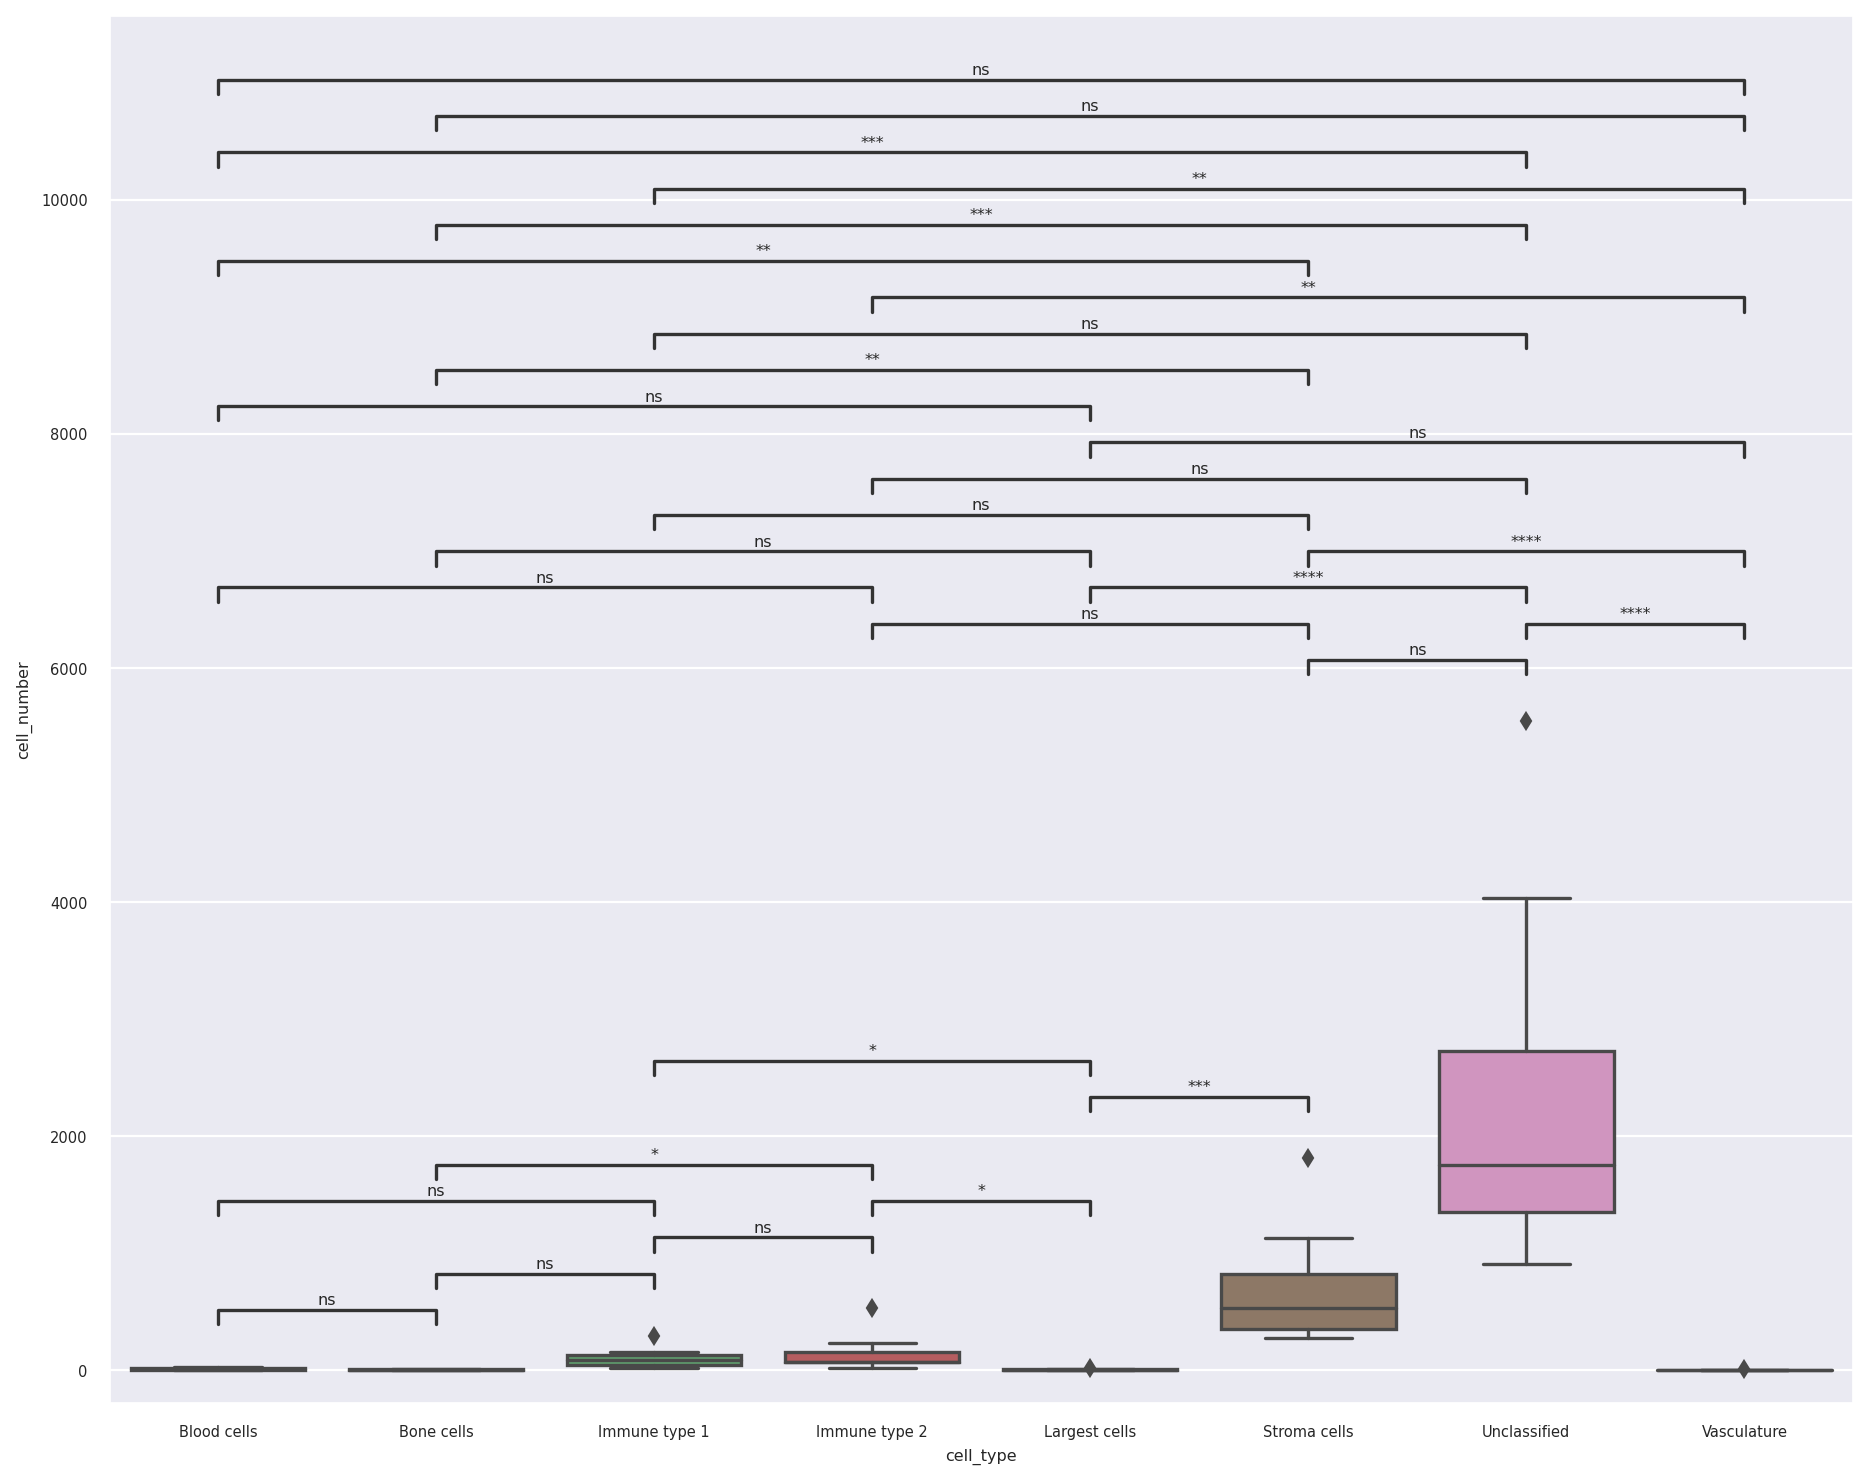

In [124]:
stat_plot(df_p_val=dunn_df, data=comm_3, x='cell_type')

Микроокружение 4.

Некоторые распределения отличаются от нормального, для сравнения нескольких групп будет использоваться Крускал-Уоллис тест.

In [125]:
# Community 4.

comm_4 = comm_cell_df[comm_cell_df['cell_interaction'] == 'community_4']

# Sharipo test.

for i in comm_4['cell_type'].unique():
  stat, p = shapiro(comm_4[comm_4['cell_type'] == i]['cell_number'])
  print('p-value', p)

p-value 0.0005114884697832167
p-value 1.3697400390810799e-05
p-value 0.0003065667115151882
p-value 0.06165190786123276
p-value 0.00503216776996851
p-value 0.005778099410235882
p-value 0.003254269016906619
p-value 0.1274256855249405


Есть статистически значимые различия между количеством разных клетов в третьем микроокружении по результатам теста Крускалл-Уоллис.

In [126]:
# Prepare the data for testing Kruskal-Wallis.

data_types = []

for typ in types:
    data_types.append(comm_4[comm_4.cell_type == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=42.59535214172761, pvalue=3.992713558023022e-07)

In [127]:
# Posthoc dunn test, with correction for multiple testing.

dunn_df = posthoc_dunn(
    comm_4, val_col='cell_number', group_col='cell_type', p_adjust="fdr_bh"
)
dunn_df

,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
Blood cells,1.000000,0.158386,0.470631,0.470631,0.499760,1.721615e-02,0.356955,1.721615e-02
Bone cells,0.158386,1.000000,0.465695,0.034893,0.428622,1.110888e-04,0.017216,3.569553e-01
Immune type 1,0.470631,0.465695,1.000000,0.161845,0.930414,1.825702e-03,0.104451,1.044515e-01
Immune type 2,0.470631,0.034893,0.161845,1.000000,0.182723,1.044515e-01,0.780084,1.825702e-03
Largest cells,0.499760,0.428622,0.930414,0.182723,1.000000,2.119863e-03,0.118994,9.814238e-02
Stroma cells,0.017216,0.000111,0.001826,0.104451,0.002120,1.000000e+00,0.161845,6.920127e-07
Unclassified,0.356955,0.017216,0.104451,0.780084,0.118994,1.618450e-01,1.000000,8.167718e-04
Vasculature,0.017216,0.356955,0.104451,0.001826,0.098142,6.920127e-07,0.000817,1.000000e+00


В результате: в четвертом микроокружении Stroma cells стат.значимо больше, чем blood cells, bone cells, vasculaturе, largest cells, Immune type 1
Количество стромальных клеток значимо не отличается от количества неклассифицированных клеток.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: Custom statistical test, P_val:1.584e-01
Bone cells vs. Immune type 1: Custom statistical test, P_val:4.657e-01
Immune type 1 vs. Immune type 2: Custom statistical test, P_val:1.618e-01
Immune type 2 vs. Largest cells: Custom statistical test, P_val:1.827e-01
Largest cells vs. Stroma cells: Custom statistical test, P_val:2.120e-03
Stroma cells vs. Unclassified: Custom statistical test, P_val:1.618e-01
Unclassified vs. Vasculature: Custom statistical test, P_val:8.168e-04
Blood cells vs. Immune type 1: Custom statistical test, P_val:4.706e-01
Bone cells vs. Immune type 2: Custom statistical test, P_val:3.489e-02
Immune type 1 vs. Largest cells: Custom statistical test, P_val:9.304e-01
Immune type 2 vs. Stroma cells: Custom statistical test, P_val:1.045e-01
Largest cells vs. Unclass

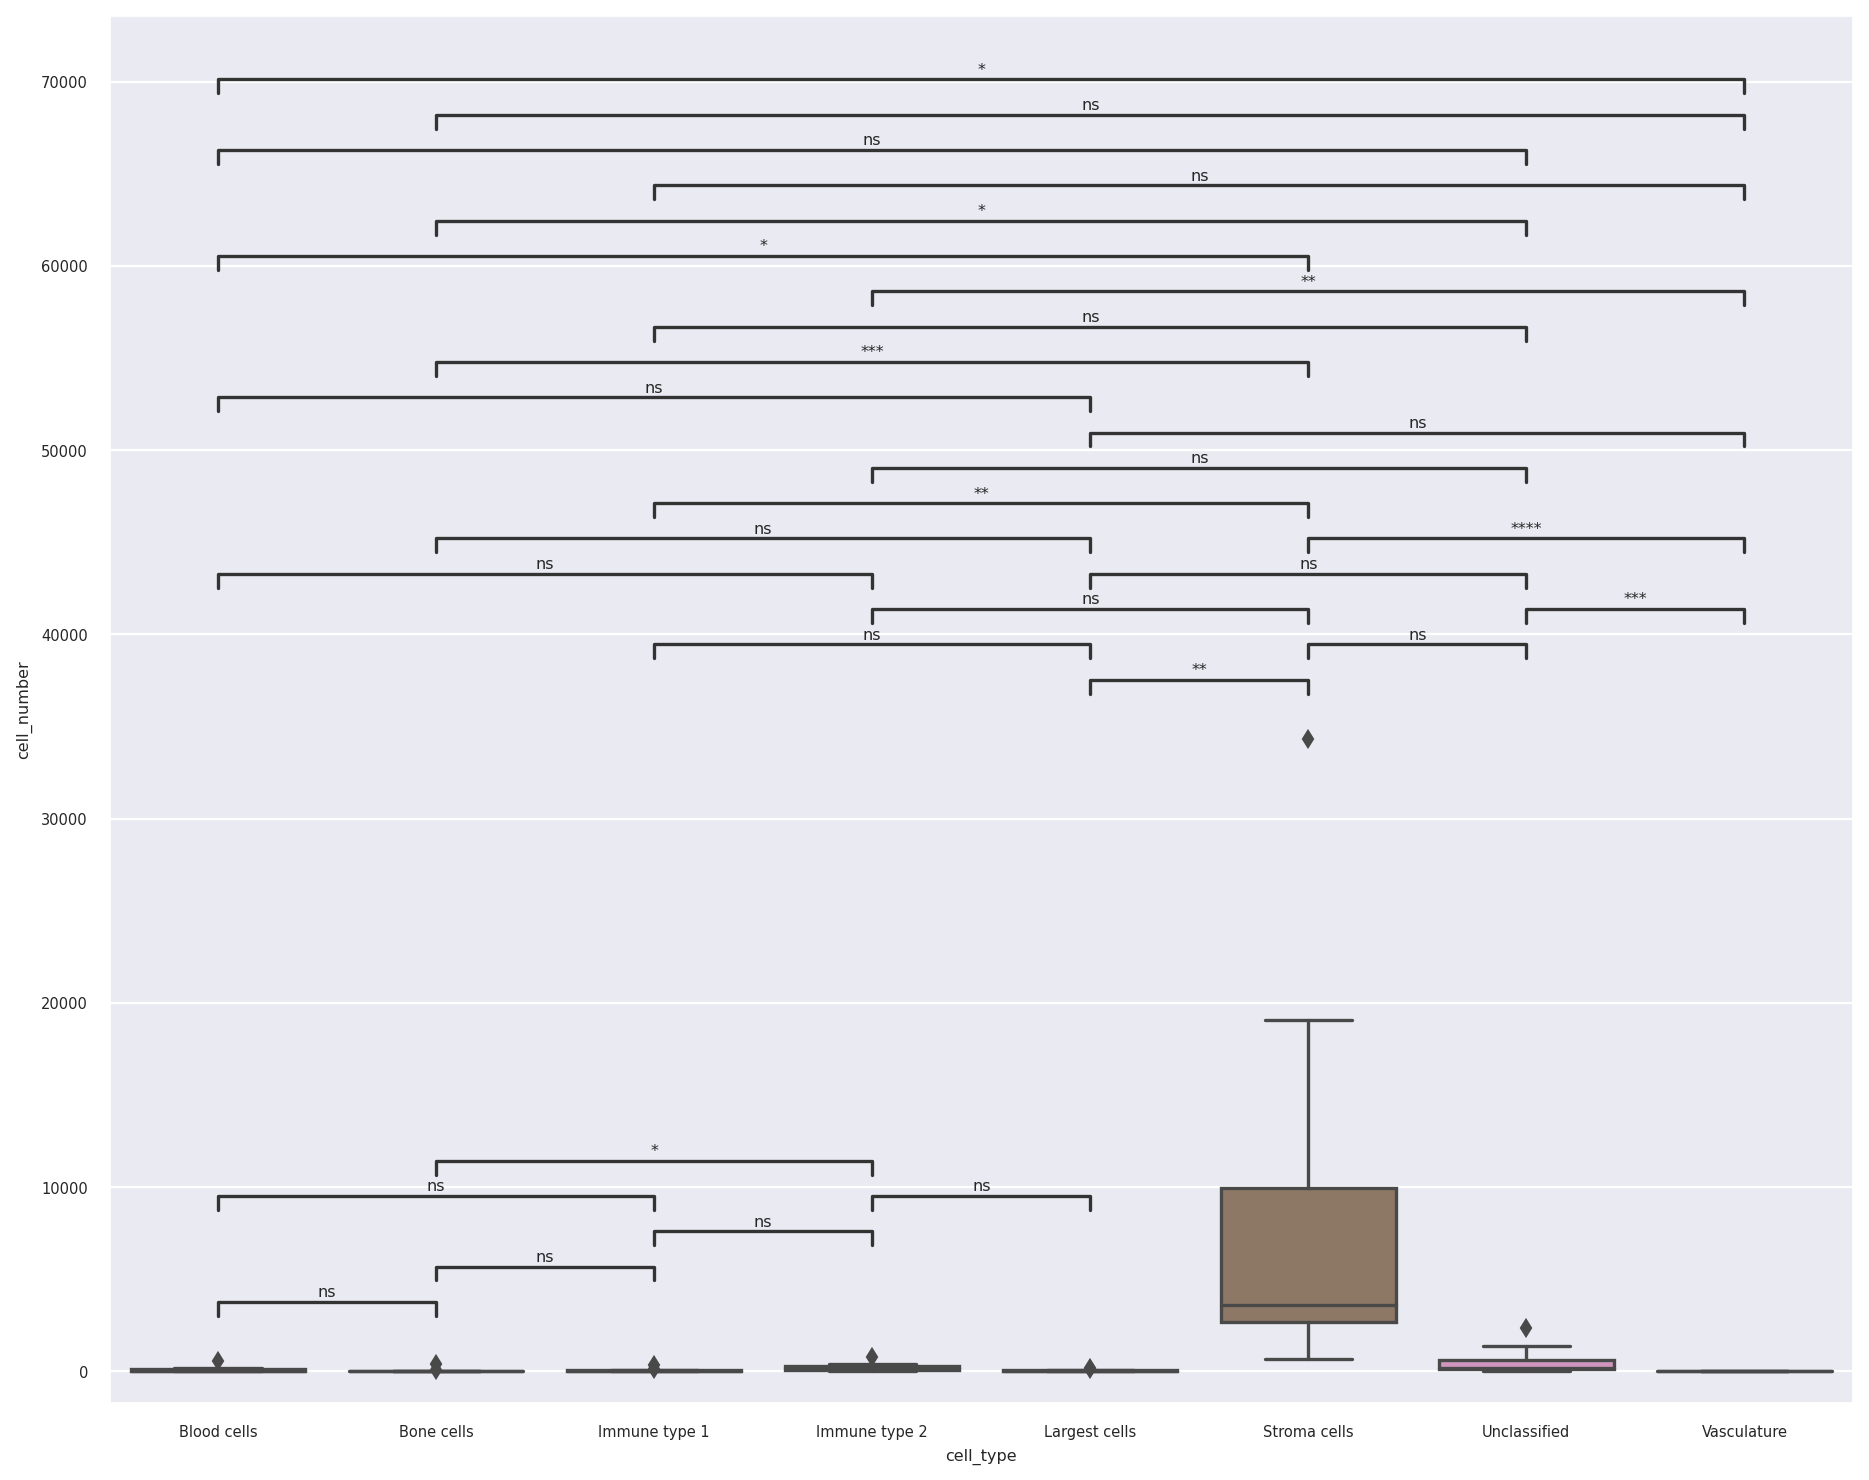

In [128]:
stat_plot(df_p_val=dunn_df, data=comm_4, x='cell_type')

Микроокружение 5.

Для выбора дальнейшего статистического теста проверим данные на нормальность.

Некоторые распределения отличаются от нормального, для сравнения нескольких групп будет использоваться Крускал-Уоллис тест.

In [129]:
# Community 5.

comm_5 = comm_cell_df[comm_cell_df['cell_interaction'] == 'community_5']

# Shapiro test.

for i in comm_5['cell_type'].unique():
  stat, p = shapiro(comm_5[comm_5['cell_type'] == i]['cell_number'])
  print('p-value', p)

p-value 0.34009304642677307
p-value 0.005109746940433979
p-value 0.4212202727794647
p-value 0.00048121323925442994
p-value 0.0002950017515104264
p-value 0.005794893018901348
p-value 0.09967760741710663
p-value 0.013082069344818592


Есть статистически значимые различия между количеством разных клеток в пятом микроокружении.

In [130]:
# Prepare the data for testing Kruskal-Wallis.

data_types = []

for typ in types:
    data_types.append(comm_5[comm_5.cell_type == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=50.75002004076866, pvalue=1.02887355153051e-08)

В результате: в пятом микроокружении Unclassified cells стат.значимо больше, чем blood cells, bone cells, vasculaturе, largest cells
Количество стромальных клеток значимо не отличается от количества неклассифицированных клеток.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: Custom statistical test, P_val:1.584e-01
Bone cells vs. Immune type 1: Custom statistical test, P_val:4.657e-01
Immune type 1 vs. Immune type 2: Custom statistical test, P_val:1.618e-01
Immune type 2 vs. Largest cells: Custom statistical test, P_val:1.827e-01
Largest cells vs. Stroma cells: Custom statistical test, P_val:2.120e-03
Stroma cells vs. Unclassified: Custom statistical test, P_val:1.618e-01
Unclassified vs. Vasculature: Custom statistical test, P_val:8.168e-04
Blood cells vs. Immune type 1: Custom statistical test, P_val:4.706e-01
Bone cells vs. Immune type 2: Custom statistical test, P_val:3.489e-02
Immune type 1 vs. Largest cells: Custom statistical test, P_val:9.304e-01
Immune type 2 vs. Stroma cells: Custom statistical test, P_val:1.045e-01
Largest cells vs. Unclass

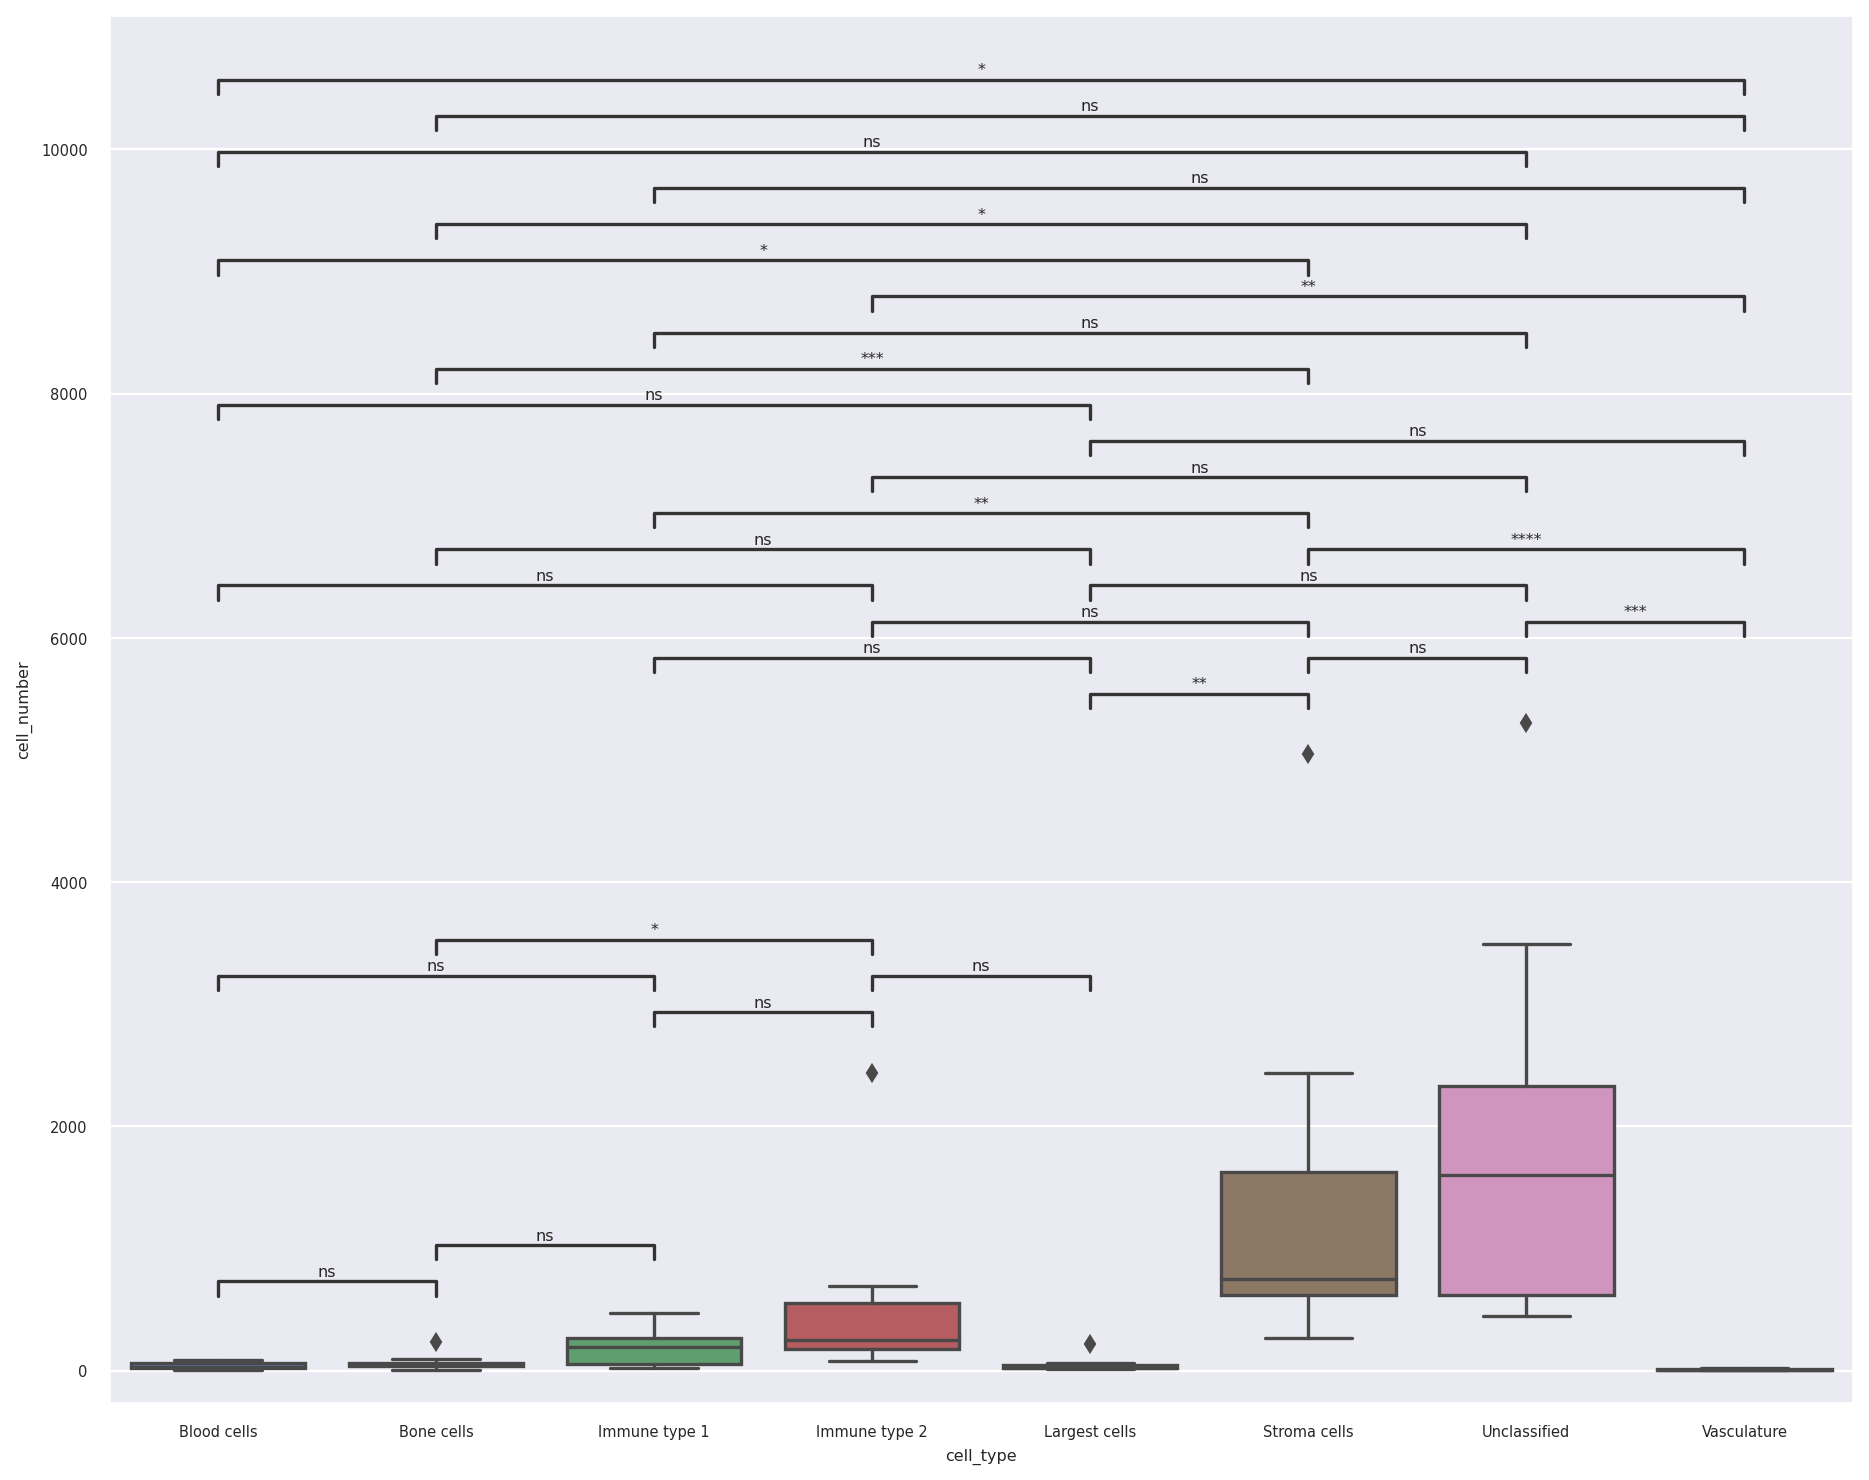

In [131]:
stat_plot(df_p_val=dunn_df, data=comm_5, x='cell_type')

Микроокружение 6.

Для выбора дальнейшего статистического теста проверим данные на нормальность.

Одно из распределений отличается от нормального, для сравнения нескольких групп будет использоваться Крускал-Уоллис тест.

In [132]:
# Community 6.

comm_6 = comm_cell_df[comm_cell_df['cell_interaction'] == 'community_6']

# Shapiro test.

for i in comm_6['cell_type'].unique():
  stat, p = shapiro(comm_6[comm_6['cell_type'] == i]['cell_number'])
  print('p-value', p)

p-value 0.22161038219928741
p-value 0.30044814944267273
p-value 0.14443165063858032
p-value 0.0009729053708724678
p-value 0.07391357421875
p-value 0.06232478842139244
p-value 0.1365228295326233
p-value 0.06343603879213333


In [133]:
# Prepare the data for testing Kruskal-Wallis.

data_types = []

for typ in types:
    data_types.append(comm_6[comm_6.cell_type == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=54.412156514769876, pvalue=1.949238853378085e-09)

In [134]:
# Posthoc dunn test, with correction for multiple testing.

dunn_df = posthoc_dunn(
    comm_6, val_col='cell_number', group_col='cell_type', p_adjust="fdr_bh"
)
dunn_df

,Blood cells,Bone cells,Immune type 1,Immune type 2,Largest cells,Stroma cells,Unclassified,Vasculature
Blood cells,1.000000,0.978573,0.099251,0.033690,0.094561,7.651361e-05,0.000819,2.227329e-01
Bone cells,0.978573,1.000000,0.099251,0.033690,0.094561,7.651361e-05,0.000819,2.221564e-01
Immune type 1,0.099251,0.099251,1.000000,0.611128,0.959372,2.726430e-02,0.094561,4.334815e-03
Immune type 2,0.033690,0.033690,0.611128,1.000000,0.656760,9.456119e-02,0.237417,8.092537e-04
Largest cells,0.094561,0.094561,0.959372,0.656760,1.000000,3.242302e-02,0.099251,3.506193e-03
Stroma cells,0.000077,0.000077,0.027264,0.094561,0.032423,1.000000e+00,0.575669,2.078584e-07
Unclassified,0.000819,0.000819,0.094561,0.237417,0.099251,5.756686e-01,1.000000,4.851846e-06
Vasculature,0.222733,0.222156,0.004335,0.000809,0.003506,2.078584e-07,0.000005,1.000000e+00


В результате: в шестом микроокружении Stroma cells стат.значимо больше, чем blood cells, bone cells, vasculaturе, largest cells, Immune type 1.

Количество стромальных клеток значимо не отличается от количества неклассифицированных клеток.

Таким образом во всех микроокружениях преобладают по количеству Strome cells и Unclassified cells.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blood cells vs. Bone cells: Custom statistical test, P_val:9.786e-01
Bone cells vs. Immune type 1: Custom statistical test, P_val:9.925e-02
Immune type 1 vs. Immune type 2: Custom statistical test, P_val:6.111e-01
Immune type 2 vs. Largest cells: Custom statistical test, P_val:6.568e-01
Largest cells vs. Stroma cells: Custom statistical test, P_val:3.242e-02
Stroma cells vs. Unclassified: Custom statistical test, P_val:5.757e-01
Unclassified vs. Vasculature: Custom statistical test, P_val:4.852e-06
Blood cells vs. Immune type 1: Custom statistical test, P_val:9.925e-02
Bone cells vs. Immune type 2: Custom statistical test, P_val:3.369e-02
Immune type 1 vs. Largest cells: Custom statistical test, P_val:9.594e-01
Immune type 2 vs. Stroma cells: Custom statistical test, P_val:9.456e-02
Largest cells vs. Unclass

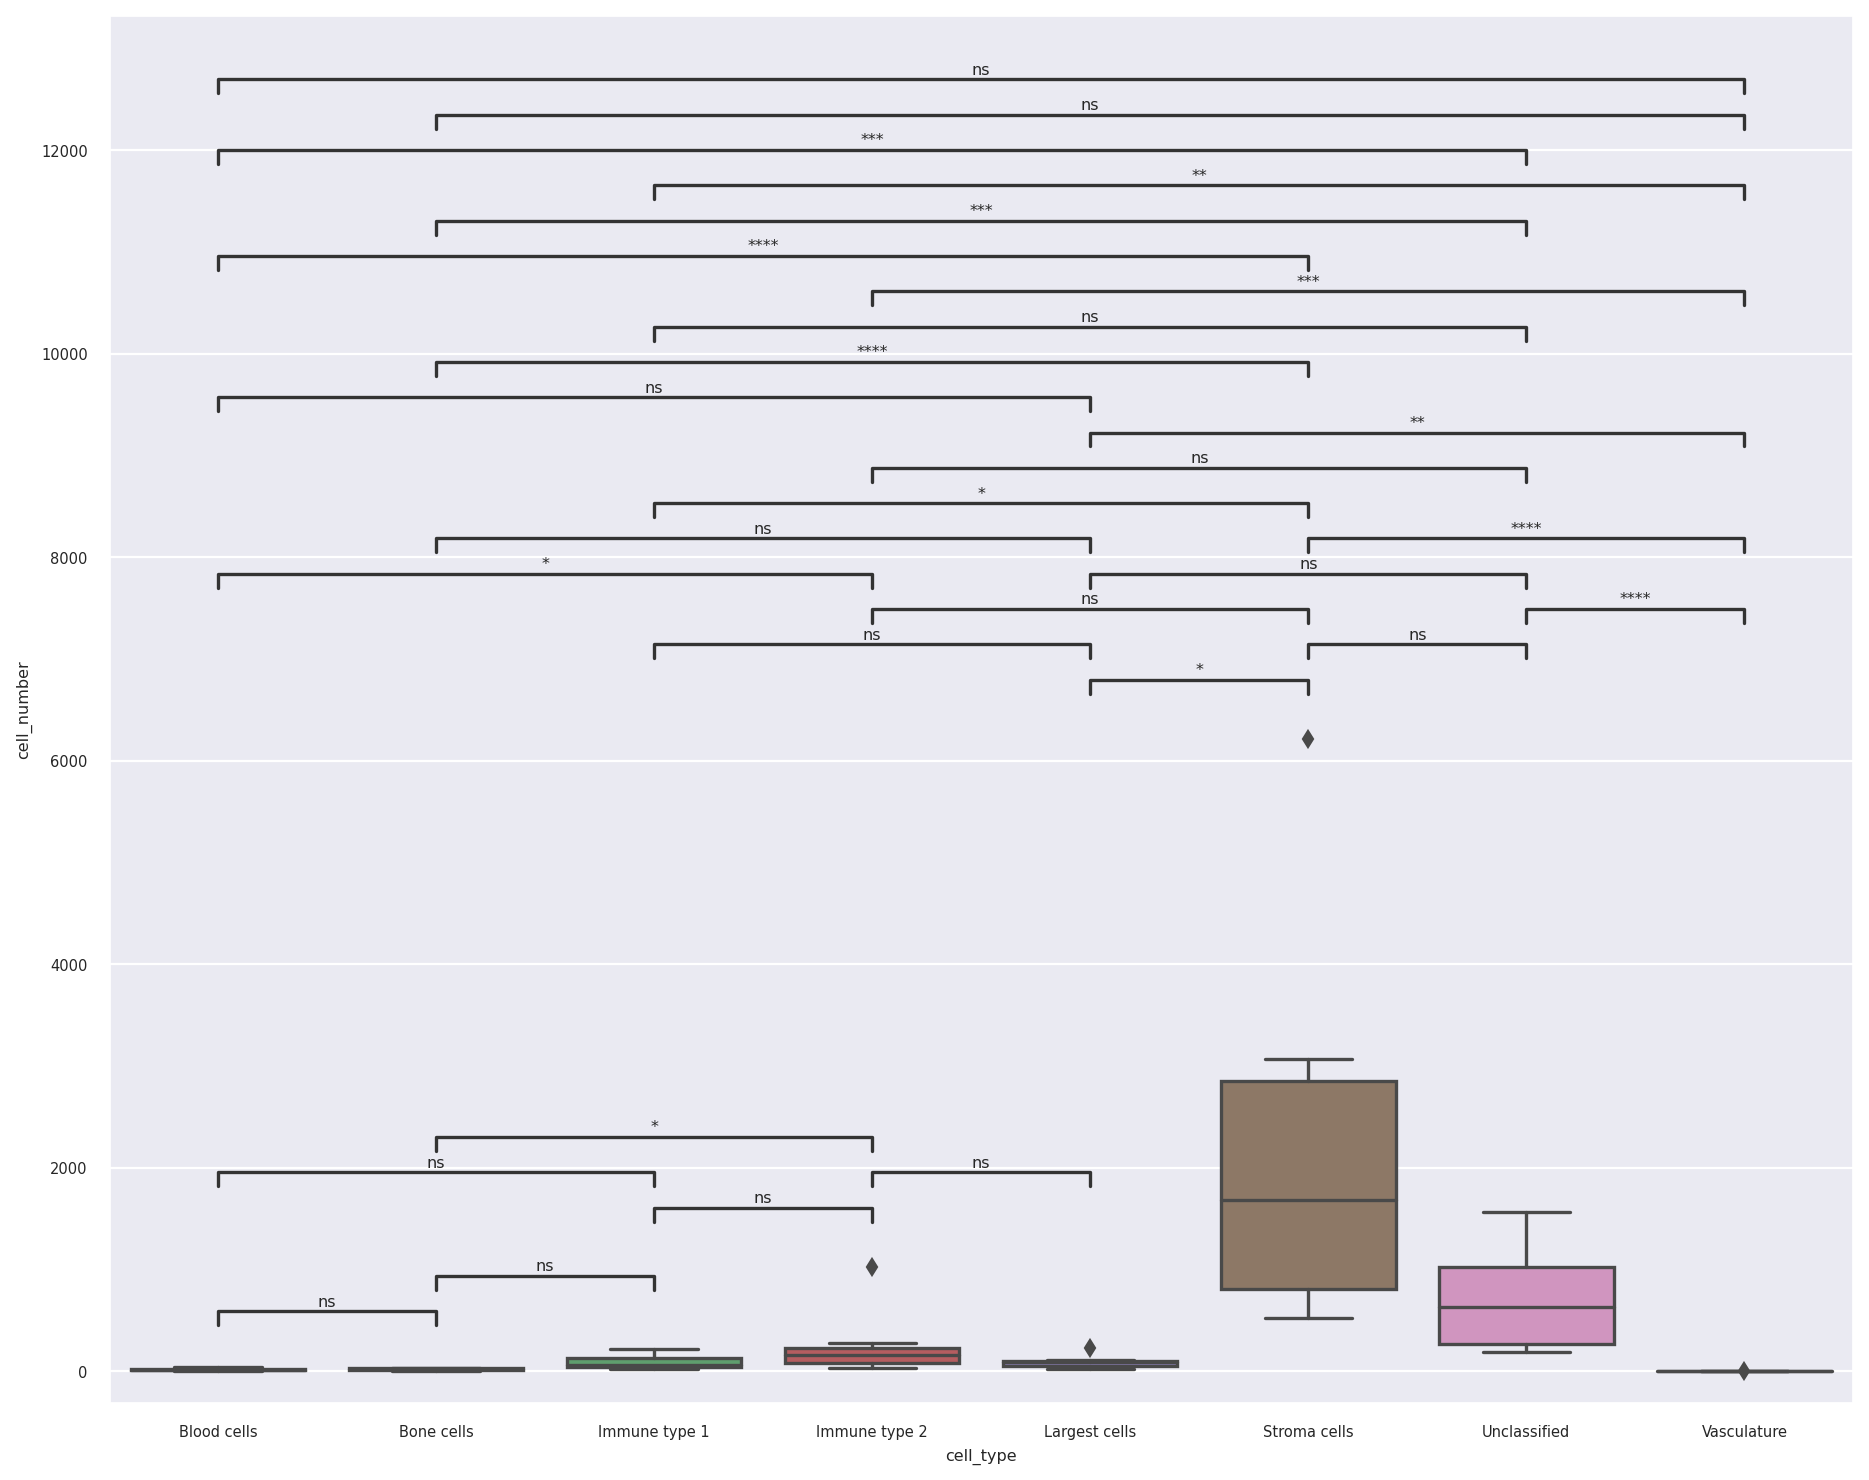

In [135]:
stat_plot(df_p_val=dunn_df, data=comm_6, x='cell_type')

Теперь можно посмотреть в каких микроокружениях больше всего Stroma cells и Unclassified cells.

Сначала рассмотрим Stroma cells.

In [136]:
# Create dataframe.

stroma_df = comm_cell_df[comm_cell_df['cell_type'] == 'Stroma cells']
stroma_df.head()

,cell_interaction,cell_type,cell_number
240,community_1,Stroma cells,5522.0
241,community_1,Stroma cells,6490.0
242,community_1,Stroma cells,1401.0
243,community_1,Stroma cells,975.0
244,community_1,Stroma cells,9576.0


Некоторые распределения отличаются от нормального.

Для сравнения групп будет использован тест Крускалл-Уоллиса.

In [137]:
# Shapiro test.

for i in stroma_df['cell_interaction'].unique():
  stat, p = shapiro(stroma_df[stroma_df['cell_interaction'] == i]['cell_number'])
  print('p-value', p)

p-value 0.35242003202438354
p-value 0.05828448012471199
p-value 0.04557549208402634
p-value 0.005778099410235882
p-value 0.005794893018901348
p-value 0.06232478842139244


In [138]:
# Prepare the data for testing Kruskal-Wallis.

types = np.unique(stroma_df.cell_interaction)
data_types = []

for typ in types:
    data_types.append(stroma_df[stroma_df.cell_interaction == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=18.727040816326507, pvalue=0.0021605838372889432)

При проведении теста Крускалл-Уоллис определяются значимые различия по количесиву стромальных клеток в разных микроокружениях.

Теперь можно провести пост-хок тестирование Даннет тестом.

In [139]:
# Posthoc dunn test, with correction for multiple testing.

dunn_df = posthoc_dunn(
    stroma_df, val_col='cell_number', group_col='cell_interaction', p_adjust="fdr_bh"
)
dunn_df

,community_1,community_2,community_3,community_4,community_5,community_6
community_1,1.000000,0.815844,0.008655,1.000000,0.050153,0.246762
community_2,0.815844,1.000000,0.016073,0.815844,0.091705,0.379647
community_3,0.008655,0.016073,1.000000,0.008655,0.489207,0.152783
community_4,1.000000,0.815844,0.008655,1.000000,0.050153,0.246762
community_5,0.050153,0.091705,0.489207,0.050153,1.000000,0.468996
community_6,0.246762,0.379647,0.152783,0.246762,0.468996,1.000000


По результатам пост-хок тестирования значимые различия по содержанию стромальных клеток определяются для 3 и 1, 2 и 3, 3 и 4 микроокружений.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Custom statistical test, P_val:8.158e-01
community_2 vs. community_3: Custom statistical test, P_val:1.607e-02
community_3 vs. community_4: Custom statistical test, P_val:8.655e-03
community_4 vs. community_5: Custom statistical test, P_val:5.015e-02
community_5 vs. community_6: Custom statistical test, P_val:4.690e-01
community_1 vs. community_3: Custom statistical test, P_val:8.655e-03
community_2 vs. community_4: Custom statistical test, P_val:8.158e-01
community_3 vs. community_5: Custom statistical test, P_val:4.892e-01
community_4 vs. community_6: Custom statistical test, P_val:2.468e-01
community_1 vs. community_4: Custom statistical test, P_val:1.000e+00
community_2 vs. community_5: Custom statistical test, P_val:9.171e-02
community_3 vs. community_6: Custom statistical t

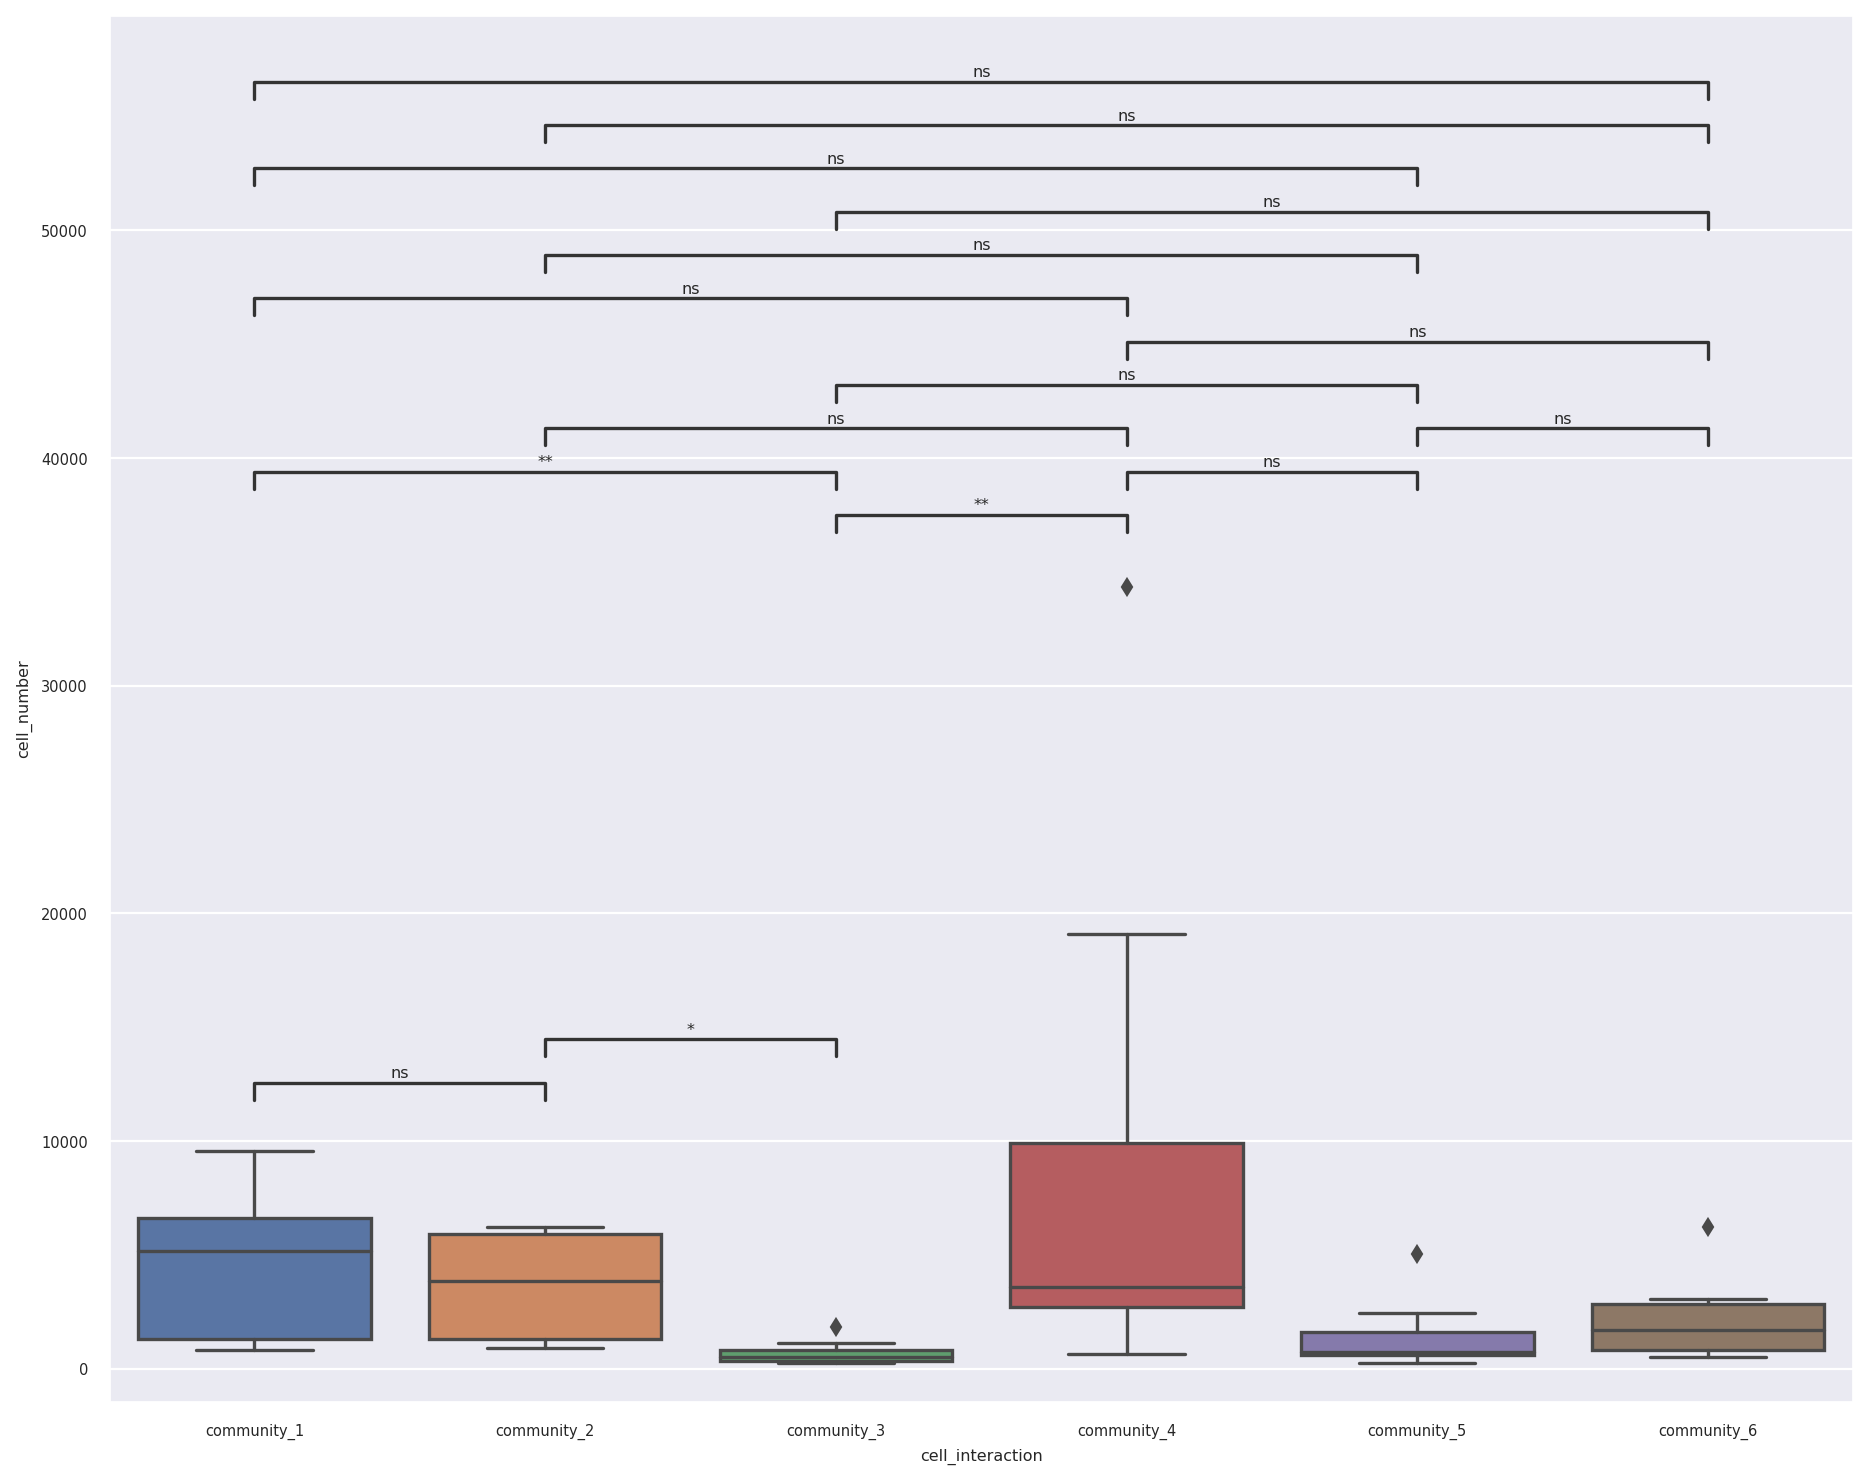

In [140]:
stat_plot(df_p_val=dunn_df, data=stroma_df, x='cell_interaction')

Теперь рассмотрим Unclassified cells.
Проведем аналогичный анализ.

In [141]:
# Create dataframe.

unclass_df = comm_cell_df[comm_cell_df['cell_type'] == 'Unclassified']
unclass_df.head()

,cell_interaction,cell_type,cell_number
288,community_1,Unclassified,396.0
289,community_1,Unclassified,651.0
290,community_1,Unclassified,117.0
291,community_1,Unclassified,85.0
292,community_1,Unclassified,1350.0


In [142]:
# Shapiro test.

for i in unclass_df['cell_interaction'].unique():
  stat, p = shapiro(unclass_df[unclass_df['cell_interaction'] == i]['cell_number'])
  print('p-value', p)

p-value 0.3281635046005249
p-value 0.16276967525482178
p-value 0.06723471730947495
p-value 0.003254269016906619
p-value 0.09967760741710663
p-value 0.1365228295326233


In [143]:
# Prepare the data for testing Kruskal-Wallis.

data_types = []

for typ in types:
    data_types.append(unclass_df[unclass_df.cell_interaction == typ]['cell_number'])

# Kruskal-Wallis test.

stats.kruskal(*data_types)

KruskalResult(statistic=18.966836734693857, pvalue=0.0019496673303232715)

In [144]:
# Posthoc dunn test, with correction for multiple testing.

dunn_df = posthoc_dunn(
    unclass_df, val_col='cell_number', group_col='cell_interaction', p_adjust="fdr_bh"
)
dunn_df

,community_1,community_2,community_3,community_4,community_5,community_6
community_1,1.000000,0.039178,0.025539,0.858274,0.050010,0.664964
community_2,0.039178,1.000000,0.756101,0.033209,0.858274,0.128516
community_3,0.025539,0.756101,1.000000,0.023607,0.664964,0.050010
community_4,0.858274,0.033209,0.023607,1.000000,0.039178,0.557901
community_5,0.050010,0.858274,0.664964,0.039178,1.000000,0.167354
community_6,0.664964,0.128516,0.050010,0.557901,0.167354,1.000000


Есть значимые различия в количестве неклассифицированных клеток для 1 и 2, 1 и 3, 2 и 4, 3 и 4, 4 и 5.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_1 vs. community_2: Custom statistical test, P_val:3.918e-02
community_2 vs. community_3: Custom statistical test, P_val:7.561e-01
community_3 vs. community_4: Custom statistical test, P_val:2.361e-02
community_4 vs. community_5: Custom statistical test, P_val:3.918e-02
community_5 vs. community_6: Custom statistical test, P_val:1.674e-01
community_1 vs. community_3: Custom statistical test, P_val:2.554e-02
community_2 vs. community_4: Custom statistical test, P_val:3.321e-02
community_3 vs. community_5: Custom statistical test, P_val:6.650e-01
community_4 vs. community_6: Custom statistical test, P_val:5.579e-01
community_1 vs. community_4: Custom statistical test, P_val:8.583e-01
community_2 vs. community_5: Custom statistical test, P_val:8.583e-01
community_3 vs. community_6: Custom statistical t

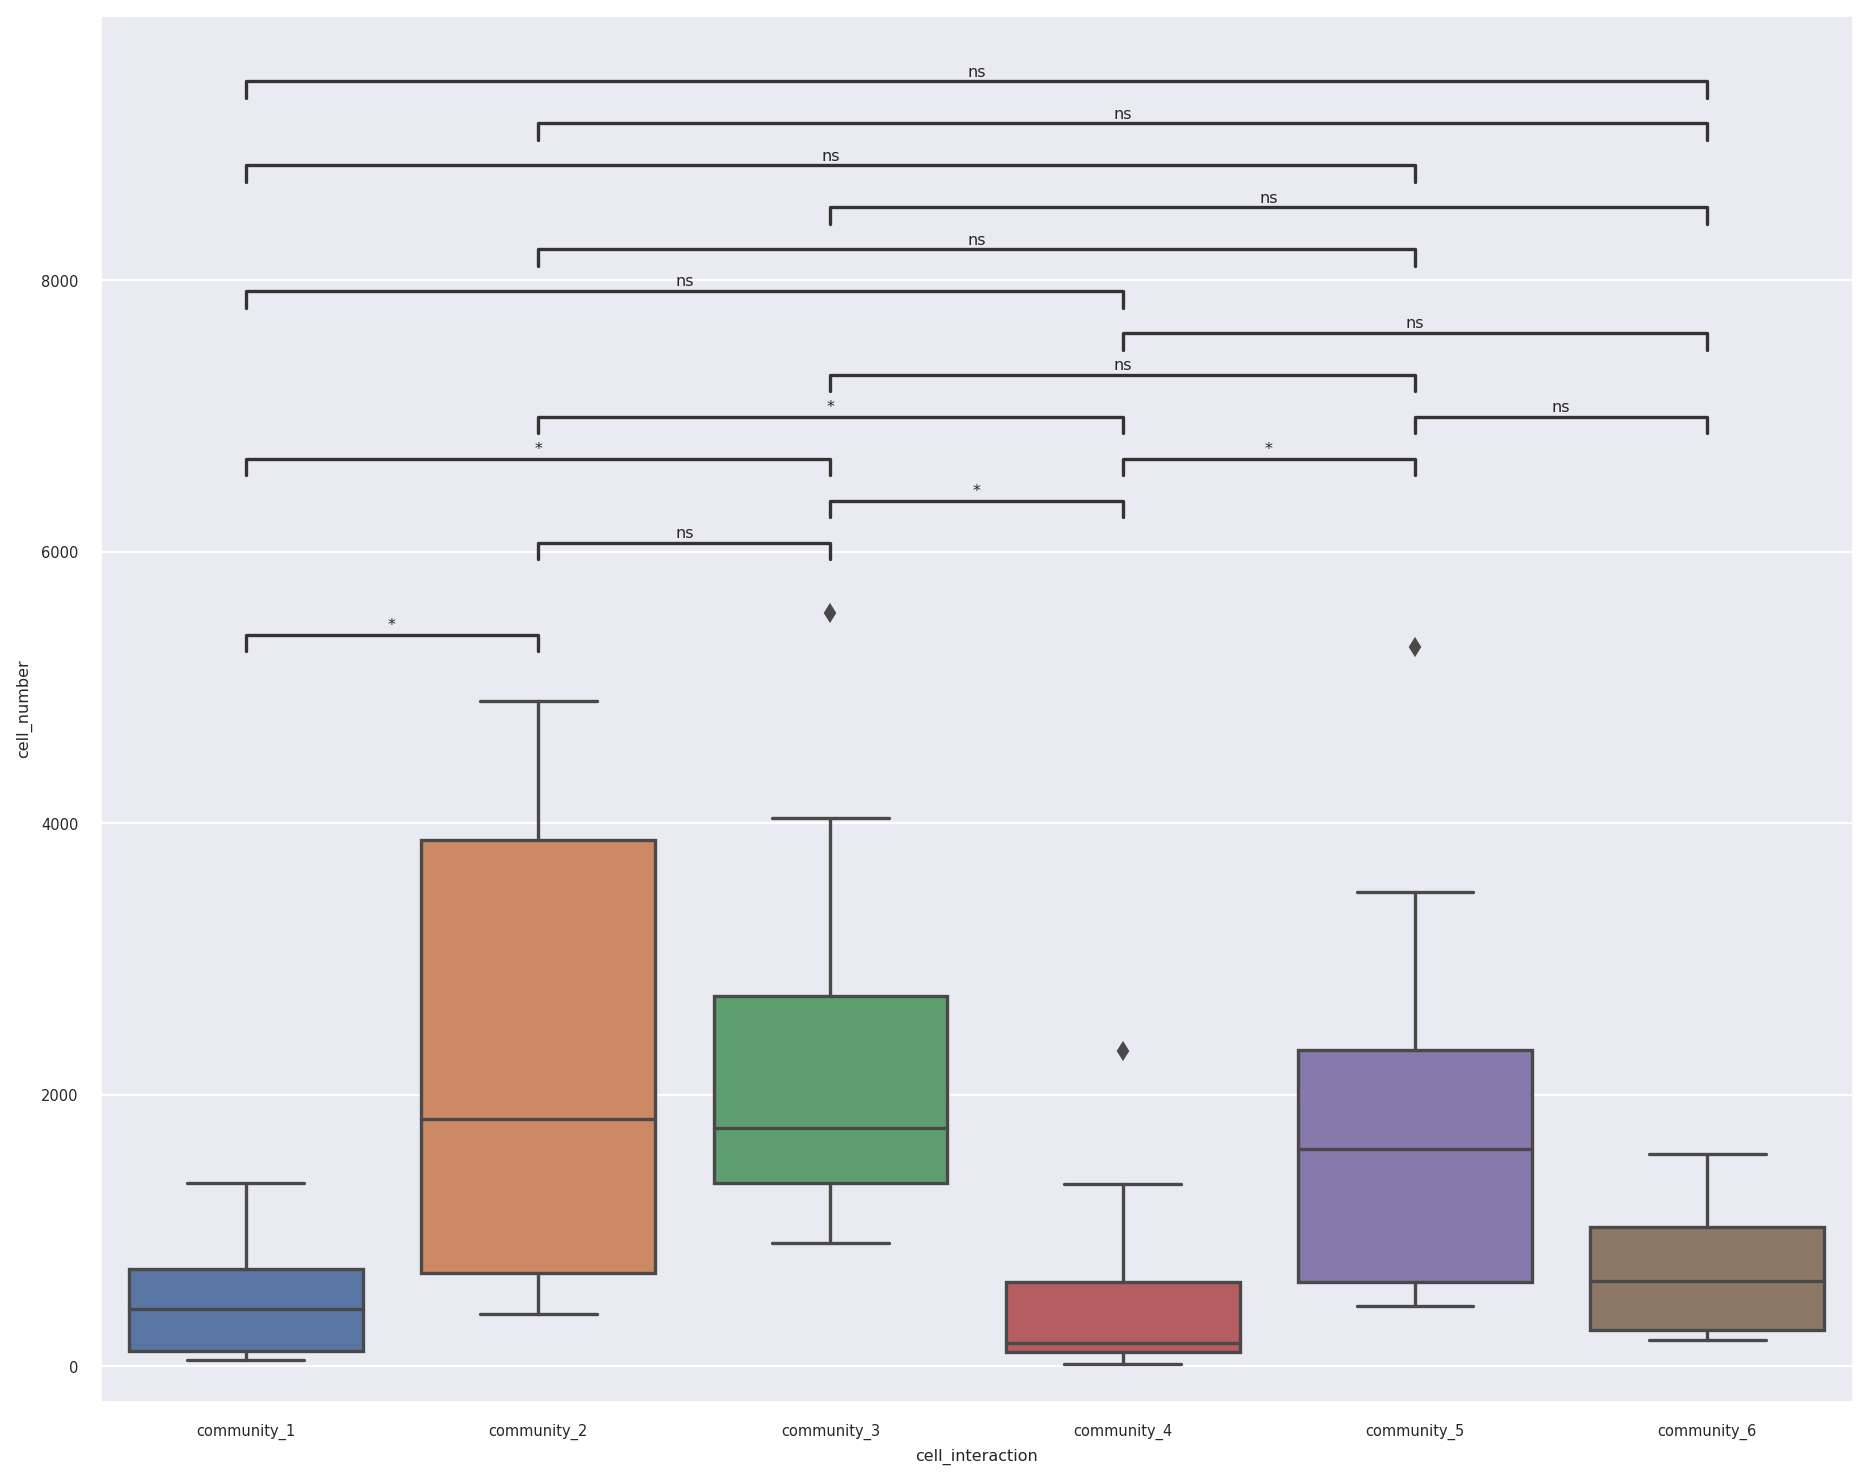

In [145]:
stat_plot(df_p_val=dunn_df, data=unclass_df, x='cell_interaction')

**Задание 3.**

Есть ли разница в доле микроокружения в тканях пациентов разных возрастов?

Необходимо посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

In [ ]:
# Task 3.

# Count the number of cells in each community by age.
# Converting a table.

comm_age_df = pd.pivot_table(df, 
                index=['age_group', 'case_id'], 
                columns='cell_interaction',
                values='index',
                aggfunc=len
                ).fillna(0)

comm_age_df.head()

cell_interaction     community_1  community_2  community_3  community_4  \
age_group   case_id                                                       
elder_group 40              7421         7734         8252         3669   
            559             1670         1389         1332          947   
            566             1287         2287         1404         3584   
            891             1044         1619         2265          719   
young_group 199             8318        10530         5593         7626   

cell_interaction     community_5  community_6  
age_group   case_id                            
elder_group 40             13664         9322  
            559             1457         1128  
            566              891         4279  
            891             1617         1561  
young_group 199             7074         4649

In [ ]:
# Calculate the fraction of community.

comm_age_df = comm_age_df.div(comm_age_df.sum(axis=1), axis=0)

comm_age_df = comm_age_df.reset_index()

comm_age_df.head()

cell_interaction,age_group,case_id,community_1,community_2,community_3,community_4,community_5,community_6
0,elder_group,40,0.148236,0.154488,0.164836,0.073289,0.272942,0.186209
1,elder_group,559,0.210779,0.175312,0.168118,0.119525,0.183895,0.142370
2,elder_group,566,0.093723,0.166545,0.102243,0.260996,0.064885,0.311608
3,elder_group,891,0.118300,0.183456,0.256657,0.081473,0.183229,0.176884
4,young_group,199,0.189952,0.240466,0.127723,0.174149,0.161544,0.106166


Итоговый датафрейм с разделением на возрастные группы и микроокружения, с рассчетом доли для каждого пациента.

In [ ]:
cell_inter = ['community_1', 'community_2', 'community_3', 'community_4', 'community_5', 'community_6']

comm_age_df = pd.melt(comm_age_df, value_vars=cell_inter, var_name='cell_interaction',
                       value_name='cell_perc', id_vars='age_group')

comm_age_df.head()

,age_group,cell_interaction,cell_perc
0,elder_group,community_1,0.148236
1,elder_group,community_1,0.210779
2,elder_group,community_1,0.093723
3,elder_group,community_1,0.118300
4,young_group,community_1,0.189952


Для выбора дальнейшего статистического теста проверим данные на нормальность.

Все распределения значимо не отличаются от нормального.

In [ ]:
# Shapiro test.

# For young patients.
for i in comm_age_df['cell_interaction'].unique():
  stat, p = shapiro(comm_age_df[(comm_age_df['cell_interaction'] == i) &
                                (comm_age_df['age_group'] == 'young_group')]['cell_perc'])
  print('p-value', p)

# For elder patients.
for i in comm_age_df['cell_interaction'].unique():
  stat, p = shapiro(comm_age_df[(comm_age_df['cell_interaction'] == i) &
                                (comm_age_df['age_group'] == 'elder_group')]['cell_perc'])
  print('p-value', p)

p-value 0.07848651707172394
p-value 0.781876802444458
p-value 0.2629510462284088
p-value 0.2679004967212677
p-value 0.1895916908979416
p-value 0.9335640072822571
p-value 0.7336225509643555
p-value 0.9499610066413879
p-value 0.6586271524429321
p-value 0.10944618284702301
p-value 0.6350928544998169
p-value 0.2120291292667389


Проверим равеноство дисперсий тестом Бартлета (т.к. ранные распределены нормально).
По результатам теста Бартлета дисперсии в сравниваемых группах значимо не различаются.


In [ ]:
# Bartlet test.

for i in comm_age_df['cell_interaction'].unique():
  stat, p = bartlett(comm_age_df[(comm_age_df['cell_interaction'] == i) &
                                 (comm_age_df['age_group'] == 'young_group')]['cell_perc'],
                     comm_age_df[(comm_age_df['cell_interaction'] == i) &
                                 (comm_age_df['age_group'] == 'elder_group')]['cell_perc'])
  print('p-value', p)

p-value 0.6645055987623572
p-value 0.16638713513349074
p-value 0.8066376344157562
p-value 0.24247151604100928
p-value 0.7135948981690747
p-value 0.3131255390305332


Учитывая независимость выборок (разные группы пациентов), нормально распределенные данные, равенство дисперсий, в данном случае для попарных сравнений можно использовать т-тест с поправкой Бонферрони.


Статистически значимых различий между долями микроокружений у молодых и возрастных пациентов не удалось обнаружить.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

community_2_young_group vs. community_2_elder_group: t-test independent samples with Bonferroni correction, P_val:4.447e-01 t=2.160e+00
community_1_young_group vs. community_1_elder_group: t-test independent samples with Bonferroni correction, P_val:5.787e-01 t=1.969e+00
community_3_young_group vs. community_3_elder_group: t-test independent samples with Bonferroni correction, P_val:4.969e-01 t=-2.079e+00
community_4_young_group vs. community_4_elder_group: t-test independent samples with Bonferroni correction, P_val:6.255e-01 t=1.913e+00
community_5_young_group vs. community_5_elder_group: t-test independent samples with Bonferroni correction, P_val:1.000e+00 t=-1.224e+00
community_6_young_group vs. community_6_elder_group: t-test independent samples with Bonferroni correction, P_val:8.681e-02 t=-3.402e+00


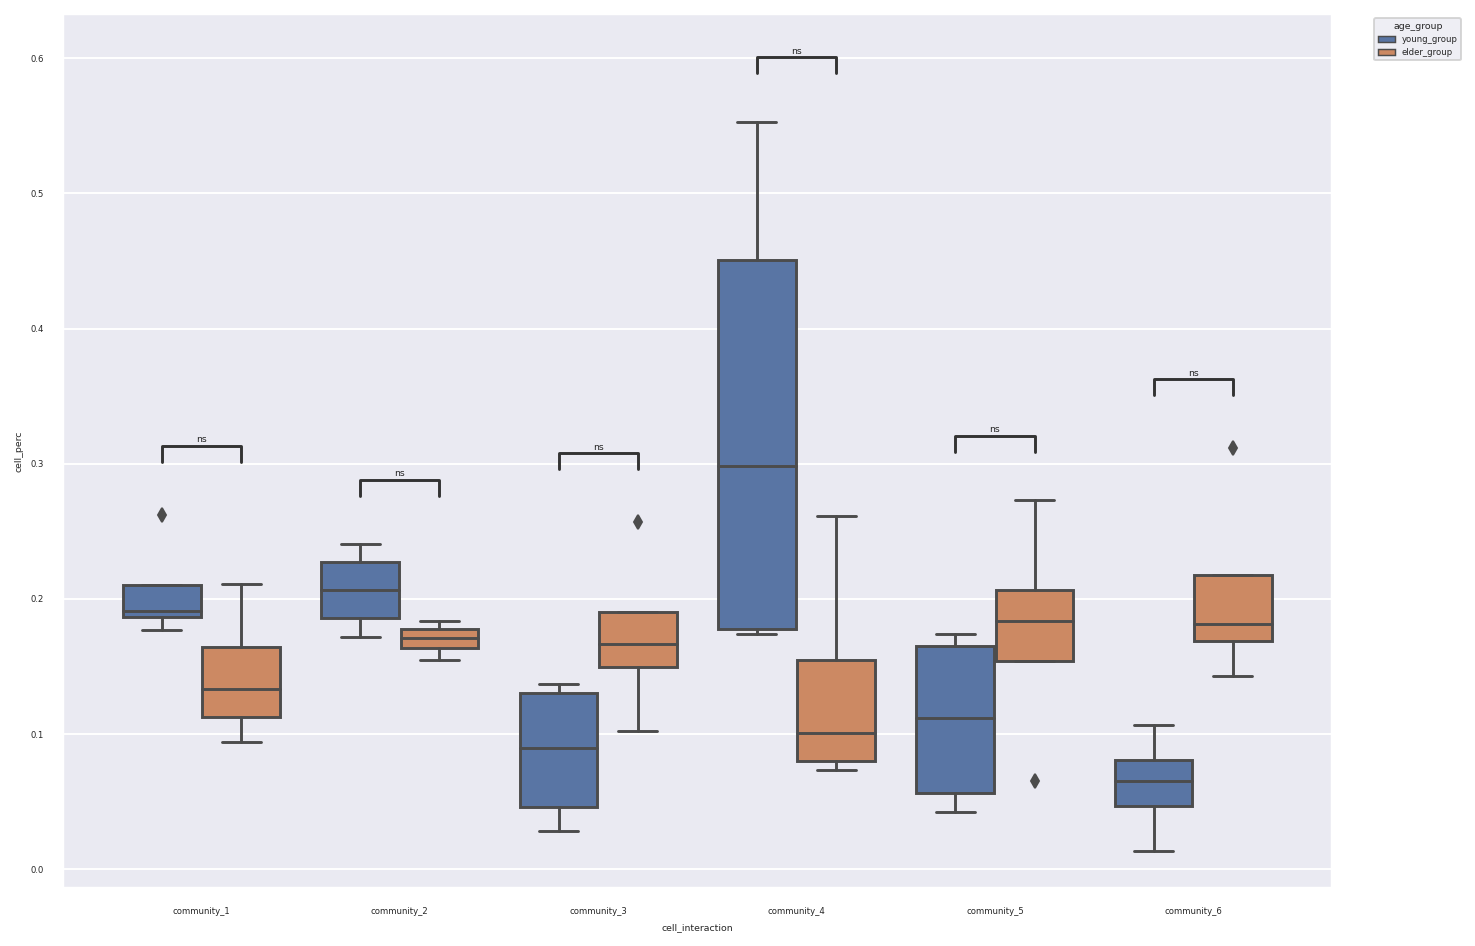

In [ ]:
# Pair for comparisons.

pairs = [((cell_in, 'young_group'), (cell_in, 'elder_group'))
                     for cell_in in comm_age_df['cell_interaction'].unique()]

# Create variables.

x = 'cell_interaction'
y = 'cell_perc' 
hue = 'age_group'

hue_order = ['young_group', 'elder_group']

sns.set (font_scale=0.4)

# Boxplots.

ax = sns.boxplot(data=comm_age_df, x=x, y=y, hue=hue, hue_order=hue_order)

annotator = Annotator(ax, pairs, data=comm_age_df, x=x, y=y, hue_order=hue_order, hue=hue)
annotator.configure(test='t-test_ind', comparisons_correction='bonferroni', text_format='star', loc='inside')
annotator.apply_and_annotate()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)


**Задание 4.**

Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [ ]:
# Task 4.
# Immune cell datasets (young and elderly patients).

df_distance_imm = data[(data['cell_type'] == 'Immune type 1') | (data['cell_type'] == 'Immune type 2')]

df_distance_imm_young = df_distance_imm[df_distance_imm['age_group'] == 'young_group']

df_distance_imm_elder = df_distance_imm[df_distance_imm['age_group'] == 'elder_group']

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
35,578.795873,604.065091,28.111050,117.141031,community_2,Immune type 2,891,223,elder_group
36,627.113559,636.046148,31.701647,136.872857,community_2,Immune type 2,891,214,elder_group
44,576.109024,637.306127,50.650625,350.538476,community_2,Immune type 2,891,221,elder_group
60,794.976218,603.989367,15.021383,152.144077,community_3,Immune type 2,891,281,elder_group
63,790.529070,1320.641427,14.800876,168.830195,community_1,Immune type 2,891,215,elder_group
...,...,...,...,...,...,...,...,...,...
264392,1036.926059,588.561296,30.615500,35.298096,community_1,Immune type 2,566,238,elder_group
264410,824.752971,677.412275,28.847788,47.008442,community_6,Immune type 2,566,160,elder_group
264430,583.116888,821.306384,27.336809,31.889050,community_5,Immune type 2,566,215,elder_group
264431,647.857599,759.111216,33.224285,63.161019,community_3,Immune type 1,566,391,elder_group


In [ ]:
# Datasets for stromal cells (young and elderly patients).

df_distance_str = data[data['cell_type'] == 'Stroma cells']

df_distance_str_young = df_distance_str[df_distance_str['age_group'] == 'young_group']

df_distance_str_elder = df_distance_str[df_distance_str['age_group'] == 'elder_group']

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
6,928.607245,707.710208,21.251381,201.072243,community_2,Stroma cells,891,238,elder_group
7,663.260477,743.314465,16.802267,123.042648,community_4,Stroma cells,891,254,elder_group
...,...,...,...,...,...,...,...,...,...
264450,624.161331,929.039742,24.580579,43.901825,community_4,Stroma cells,566,298,elder_group
264451,652.414800,962.935064,18.061438,42.079763,community_4,Stroma cells,566,241,elder_group
264452,657.559464,935.275303,22.234790,38.371414,community_1,Stroma cells,566,214,elder_group
264456,685.852246,655.175160,11.893887,24.487760,community_2,Stroma cells,566,240,elder_group


Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа и сразу показывать на графике результат.

In [ ]:
def get_bootstrap(
    data_column_1: pd.Series,
    data_column_2: pd.Series,
    boot_it: int=1000,
    statistic=np.mean,
    bootstrap_conf_level: float=0.95
):
    
    '''A function to test hypotheses using a bootstrap.
     Args:
           data_column_1(pd.Series): numeric values of the first sample
           data_column_2(pd.Series): numeric values of the second sample
           boot_it(int): number of bootstrap subsamples
           statistic(function): calculated statistics
           bootstrap_conf_level(float): significance level

     Returns: dict with confidece interval(ci), p-pvalue(p-value),
              bootstrap data(boot_data)
  '''
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # extracting subsamples
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Visualisation
    plt.rcParams['figure.dpi'] = 80
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

Сравним близость к сосудам у иммунных клеток и стромальных (молодые пациенты).

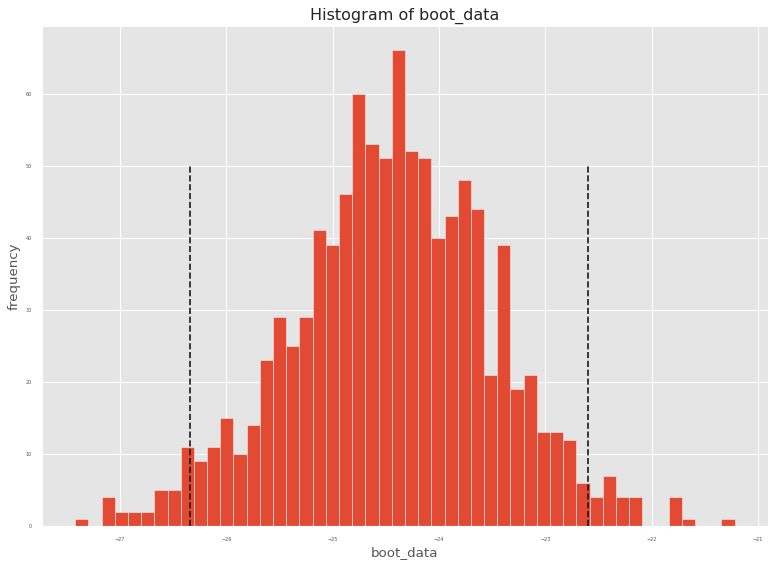

In [ ]:
booted_data_vasc = get_bootstrap(df_distance_imm_young['distance_to_vasculature'], df_distance_str_young['distance_to_vasculature'], boot_it = 1000)

Ноль не входит в доверительный интервал. Значит есть разница в средних расстояниях до кровеносных сосудов между иммунными клетками и стромальными клетками у молодых пациентов.

In [ ]:
print('p-value', booted_data_vasc['p_value'])
print('confidence interval', booted_data_vasc['ci'])

p-value 1.115988207800339e-147
confidence interval                0
0.025 -26.344505
0.975 -22.601918


Сравним близость к сосудам у иммунных клеток и стромальных (возрастные пациенты).

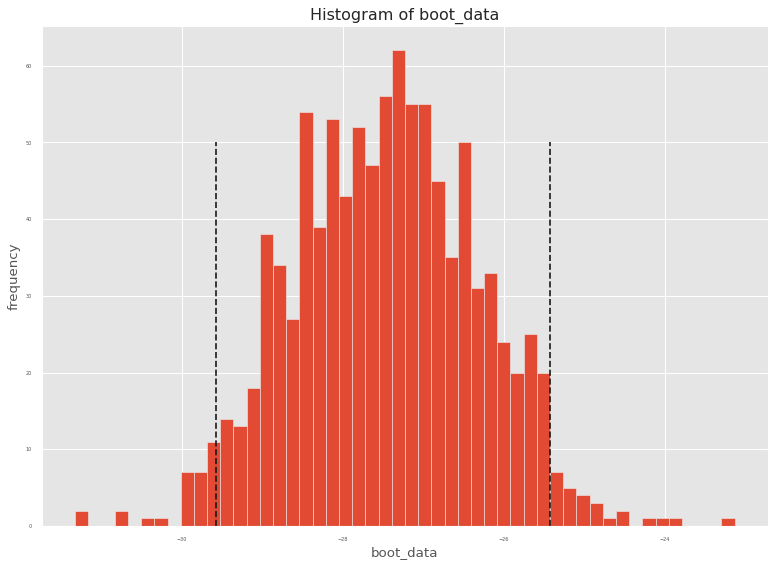

In [ ]:
booted_data_vasc_elder = get_bootstrap(df_distance_imm_elder['distance_to_vasculature'], df_distance_str_elder['distance_to_vasculature'], boot_it = 1000)

Ноль не входит в доверительный интервал. Значит есть разница в средних расстояниях до кровеносных сосудов между иммунными клетками и стромальными клетками у возрастных пациентов.

In [ ]:
print('p-value', booted_data_vasc_elder['p_value'])
print('confidence interval', booted_data_vasc_elder['ci'])

p-value 6.775703441765525e-130
confidence interval                0
0.025 -29.582220
0.975 -25.425369


Сравним близость к крупным клеткам у иммунных клеток и стромальных (молодые пациенты).

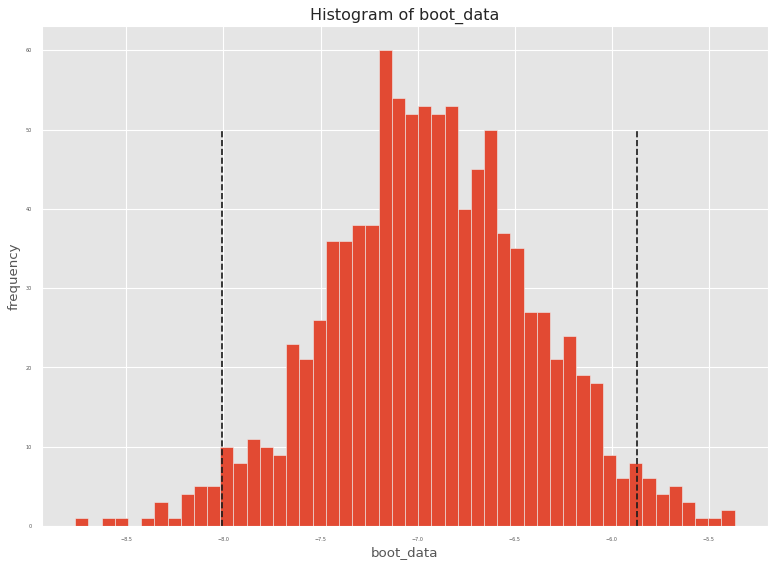

In [ ]:
booted_data_larg_cel = get_bootstrap(df_distance_imm_young['distance_to_largest_cell'], df_distance_str_young['distance_to_largest_cell'], boot_it = 1000)

Ноль не входит в доверительный интервал. Значит есть разница в средних расстояниях до крупных клеток между иммунными клетками и стромальными клетками у молодых пациентов.

In [ ]:
print('p-value', booted_data_larg_cel['p_value'])
print('confidence interval', booted_data_larg_cel['ci'])

p-value 2.2921519061298982e-39
confidence interval               0
0.025 -8.005111
0.975 -5.869827


Сравним близость к крупным клеткам у иммунных клеток и стромальных (возрастные пациенты).

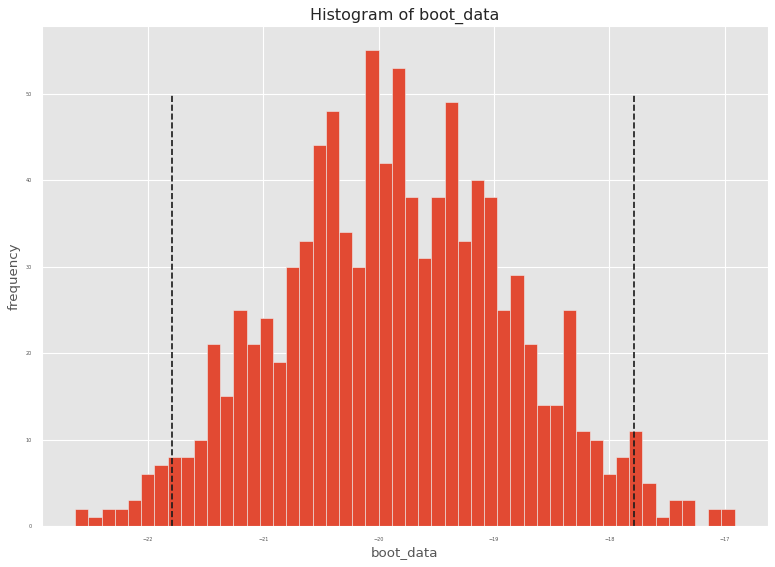

In [ ]:
booted_data_larg_cell_elder = get_bootstrap(df_distance_imm_elder['distance_to_largest_cell'], df_distance_str_elder['distance_to_largest_cell'], boot_it = 1000)

Ноль не входит в доверительный интервал. Значит есть разница в средних расстояниях до крупных клеток между иммунными клетками и стромальными клетками у возрастных пациентов.

В итоге: расстояние до сосудов и крупных клеток отличается для иммунных клеток и стромальных клеток во всех возрастных группах.

In [ ]:
print('p-value', booted_data_larg_cell_elder['p_value'])
print('confidence interval', booted_data_larg_cell_elder['ci'])

p-value 9.062985046615572e-86
confidence interval               0
0.025 -21.79099
0.975 -17.78868


По результатам графика иммунные клетки лежат ближе к кровеносным сосудам (расстояние до них меньше) в общей группе.

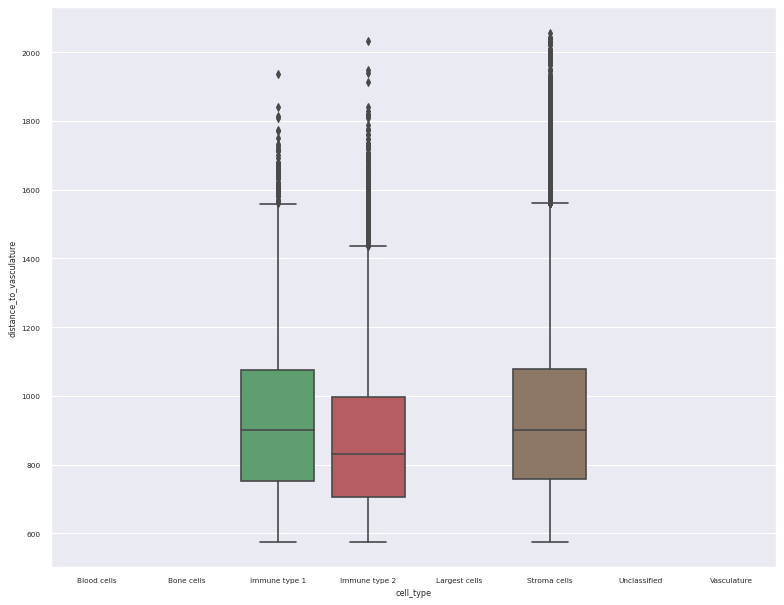

In [147]:
plt.rcParams['figure.dpi'] = 80
sns.boxplot(data = data[(data['cell_type'] == 'Stroma cells') |
                        (data['cell_type'] == 'Immune type 1') |
                        (data['cell_type'] == 'Immune type 2')],
            x = 'cell_type',
            y = 'distance_to_vasculature')

**Задание 5.**

 Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? 

In [15]:
# Task 5.

# Dataset for immune cells for young patiens.

df_perm_young = data[((data['cell_type'] == 'Immune type 1') |
                      (data['cell_type'] == 'Immune type 2')) &
                      (data['age_group'] == 'young_group')]
df_perm_young.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
316,610.444296,1000.488024,22.419208,49.971129,community_2,Immune type 2,199,142,young_group
319,704.830780,883.960378,35.305848,31.188793,community_3,Immune type 1,199,224,young_group
330,900.340098,712.535822,16.178258,31.953724,community_2,Immune type 2,199,106,young_group
357,1015.186492,780.256333,26.519416,26.983333,community_1,Immune type 2,199,279,young_group
362,930.563167,725.691921,35.846980,33.432744,community_5,Immune type 1,199,346,young_group


In [17]:
# Dataset for immune cells for elder patiens.

df_perm_elder = data[((data['cell_type'] == 'Immune type 1') |
                      (data['cell_type'] == 'Immune type 2')) &
                      (data['age_group'] == 'elder_group')]
df_perm_elder.head()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
35,578.795873,604.065091,28.111050,117.141031,community_2,Immune type 2,891,223,elder_group
36,627.113559,636.046148,31.701647,136.872857,community_2,Immune type 2,891,214,elder_group
44,576.109024,637.306127,50.650625,350.538476,community_2,Immune type 2,891,221,elder_group
60,794.976218,603.989367,15.021383,152.144077,community_3,Immune type 2,891,281,elder_group
63,790.529070,1320.641427,14.800876,168.830195,community_1,Immune type 2,891,215,elder_group


Вычислим baseline - основную статистику по иммунным клеткам у молодых пациентов.

In [19]:
baseline_young = df_perm_young.groupby('case_id')['distance_to_vasculature'].mean()
baseline_young = np.mean(baseline_young)
baseline_young

931.5790667725812

Объявим функцию для выполнения пермутационного теста.

In [153]:
def permutation_test(x: pd.Series, y: pd.Series) -> list:
  '''Function for performing permutation test.
     Args: 
        x(pd.Series): permutable array
        y(pd.Series): base array
    Returns: list of permuted samples
    
  '''
  n = len(y)

  results = []

  for i in range(10000):
    results.append(np.mean(np.random.choice(x, n, replace=True)))
  
  plt.rcParams['figure.dpi'] = 80
  sns.set (font_scale=1)
  sns.displot(results)

  return {'results': results}

Объявим переменные: x - массив с расстояниями до сосудов в общей группе,

y - массив с расстояниями в группе иммунных клеток.

In [154]:
x = data[data['age_group'] == 'young_group']['distance_to_vasculature']
y = df_perm_young['distance_to_vasculature']

Запустим функцию для формирования распределения.

Baseline в данном случае равен 931.5790667725812

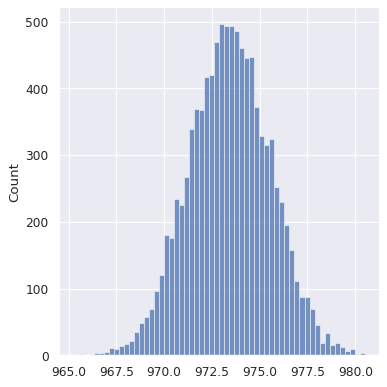

In [155]:
perm_for_young = permutation_test(x, y)

Проверим гипотезы.

Посмотрим, какая доля наблюдений из наших пермутированных выборок будет больше полученного baseline.

In [156]:
(np.array(perm_for_young['results']) >= baseline_young).sum() / len(perm_for_young['results'])

1.0

Далее проверим, какая доля средних из наших пермутированных выборок будет меньше, чем baseline.
Таким образом, вероятность получить такие же или еще меньшие значения в общей группе (p-value) - 0.0.
Иммунные клетки у молодых пациентов в среднем лежат ближе к кровеносным сосудам.

In [157]:
(np.array(perm_for_young['results']) <= baseline_young).sum() / len(perm_for_young['results'])

0.0

Проверим то же самое для пожилых пациентов.

In [28]:
# Elder patients.

x = data[data['age_group'] == 'elder_group']['distance_to_vasculature']
y = df_perm_elder['distance_to_vasculature']

In [29]:
# Calculate baseline.

baseline_elder = df_perm_elder.groupby('case_id')['distance_to_vasculature'].mean()
baseline_elder = np.mean(baseline_elder)
baseline_elder

808.4022389237441

Проведем пермутирование, получим распредение из общей группы.

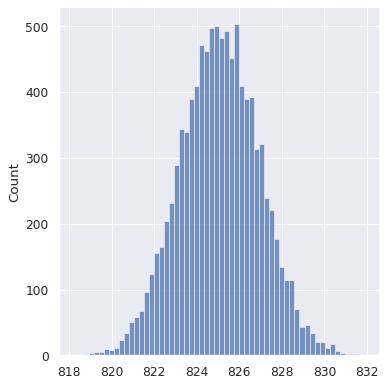

In [30]:
perm_for_elder = permutation_test(x, y)

Проверим гипотезы.

Посчитаем какая доля средних из пермутированных выборок из общей группы будет больше, чем baseline.

In [31]:
(np.array(perm_for_elder['results'])>=baseline_elder).sum() / len(perm_for_elder['results'])

1.0

Далее проверим, какая доля средних из наших пермутированных выборок будет меньше, чем baseline. Таким образом, вероятность получить такие же или еще меньшие значения в общей группе (p-value) - 0.0. Иммунные клетки у пожилых пациентов тоже в среднем лежат ближе к кровеносным сосудам.

In [32]:
(np.array(perm_for_elder['results'])<=baseline_elder).sum() / len(perm_for_elder['results'])

0.0

Посмотрим как выглядят расстояния до кровеносных сосудов на графиках для всех клеток.

У иммунных клеток расстояние меньше, еще меньше только у Vasculature.

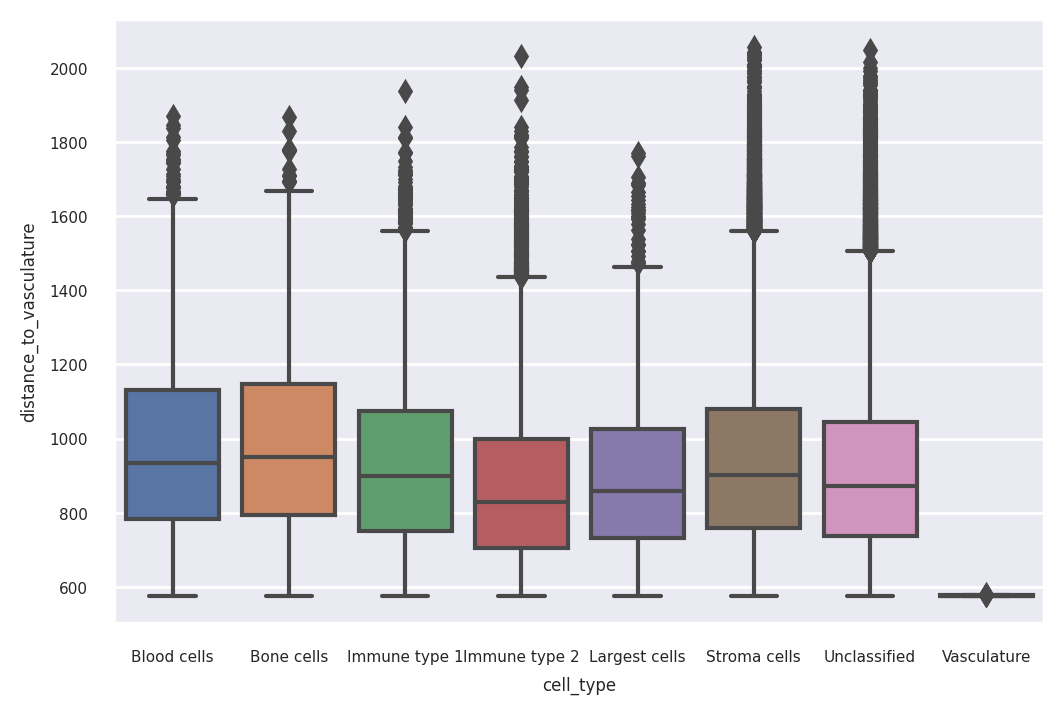

In [34]:
sns.set (font_scale=0.5)
plt.rcParams['figure.dpi'] = 200
sns.boxplot(data=data, x='cell_type', y='distance_to_vasculature')

Если посмотреть на разбиение по возрастам, то визуально у молодых расстояние до сосудов больше у всех типов клеток.

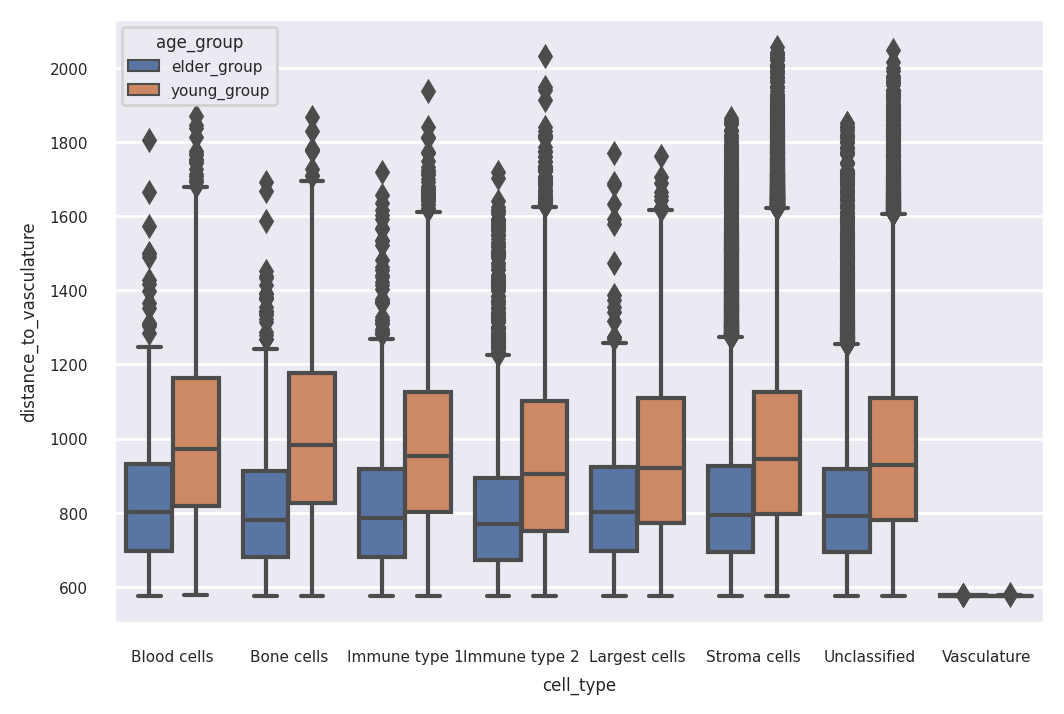

In [46]:
sns.set (font_scale=0.5)
plt.rcParams['figure.dpi'] = 200
sns.boxplot(data=data, x='cell_type', y='distance_to_vasculature', hue='age_group')

Рассмотрим отдельно две группы иммунных и не иммунных клеток.

In [41]:
data_for_comp = data.copy()

data_for_comp['immune'] = np.where(((data_for_comp['cell_type'] == 'Immune type 1') |
                                    (data_for_comp['cell_type'] == 'Immune type 2')),
                                    'immune', 'not immune')
data_for_comp.head()


,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group,immune
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group,not immune
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group,not immune
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group,not immune
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group,not immune
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group,not immune


По данному графику иммунные клетки лежат все-таки ближе к сосудам.

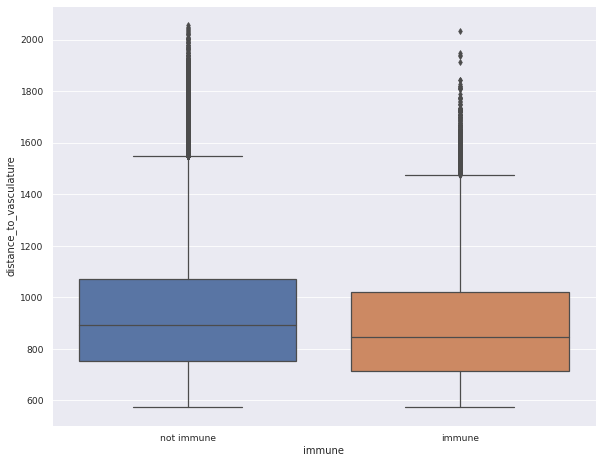

In [152]:
sns.set (font_scale=1)
plt.rcParams['figure.dpi'] = 60
sns.boxplot(data = data_for_comp, x='immune', y='distance_to_vasculature')